In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

  

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import sys
# !{sys.executable} -m pip install ipysankeywidget


# Load adata

In [3]:
""""
can ski plots of intermediatry steps below by using

adata_all = sc.read_h5ad('/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30.h5ad.updated',)

"""

'"\ncan ski plots of intermediatry steps below by using\n\nadata_all = sc.read_h5ad(\'/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30.h5ad.updated\',)\n\n'

In [59]:
# import gc
# del adata
# del acts
# gc.collect()

389759

In [60]:

import scanpy as sc
adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v3')

# Marker genes

In [61]:

net = dc.get_collectri(organism='human', split_complexes=False)
net

source          target  weight  \
0         MYC            TERT       1   
1        SPI1           BGLAP       1   
2       SMAD3             JUN       1   
3       SMAD4             JUN       1   
4      STAT5A             IL2       1   
...       ...             ...     ...   
43173    NFKB  hsa-miR-143-3p       1   
43174     AP1     hsa-miR-206       1   
43175    NFKB   hsa-miR-21-5p       1   
43176    NFKB  hsa-miR-224-5p       1   
43177     AP1     hsa-miR-144       1   

                                                    PMID  
0      10022128;10491298;10606235;10637317;10723141;1...  
1                                               10022617  
2                                      10022869;12374795  
3                                      10022869;12374795  
4      10022878;11435608;17182565;17911616;22854263;2...  
...                                                  ...  
43173                                           19472311  
43174                                           19721712  
43175                                  20813833;22387281  
43176                                  23474441;23988648  
43177                                           23546882  

[43178 rows x 4 columns]

In [62]:

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata


AnnData object with n_obs × n_vars = 165649 × 36601
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl1_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'fb_vs_other', 'fb_vs_other2', 'core', 'fbs_pericytes_other', 'leiden_res1', 'leiden_res1.5', 'old_annotation', 'test', 'fbs', 'fbs2', 'fbs3', 'new_annotation3', 'new_annotation2', 'new_annotation1', 'new_annotation00', 'fb_status_figs', 'Location_original', 'Location_broad', 'Location_detailed', 'leiden_res0.5', '

In [63]:

sc.pp.highly_variable_genes(adata,  
                                n_top_genes=6000, 
                                subset=True,
                                batch_key="DonorID",
                                check_values=False,
                                #layer="normalized"
                               ) #100


In [64]:

adata.raw = ad.AnnData(adata.layers["counts"].copy(), var=adata.var.copy(), obs=adata.obs.copy())


In [65]:

dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)


Running ulm on mat with 165649 samples and 6000 targets for 504 sources.


100%|██████████| 17/17 [00:18<00:00,  1.10s/it]


In [66]:

adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata


AnnData object with n_obs × n_vars = 165649 × 6000
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl1_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'fb_vs_other', 'fb_vs_other2', 'core', 'fbs_pericytes_other', 'leiden_res1', 'leiden_res1.5', 'old_annotation', 'test', 'fbs', 'fbs2', 'fbs3', 'new_annotation3', 'new_annotation2', 'new_annotation1', 'new_annotation00', 'fb_status_figs', 'Location_original', 'Location_broad', 'Location_detailed', 'leiden_res0.5', 't

In [67]:

acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts


AnnData object with n_obs × n_vars = 165649 × 504
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl1_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'fb_vs_other', 'fb_vs_other2', 'core', 'fbs_pericytes_other', 'leiden_res1', 'leiden_res1.5', 'old_annotation', 'test', 'fbs', 'fbs2', 'fbs3', 'new_annotation3', 'new_annotation2', 'new_annotation1', 'new_annotation00', 'fb_status_figs', 'Location_original', 'Location_broad', 'Location_detailed', 'leiden_res0.5', 'te

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1107: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=palette[label], label=label)


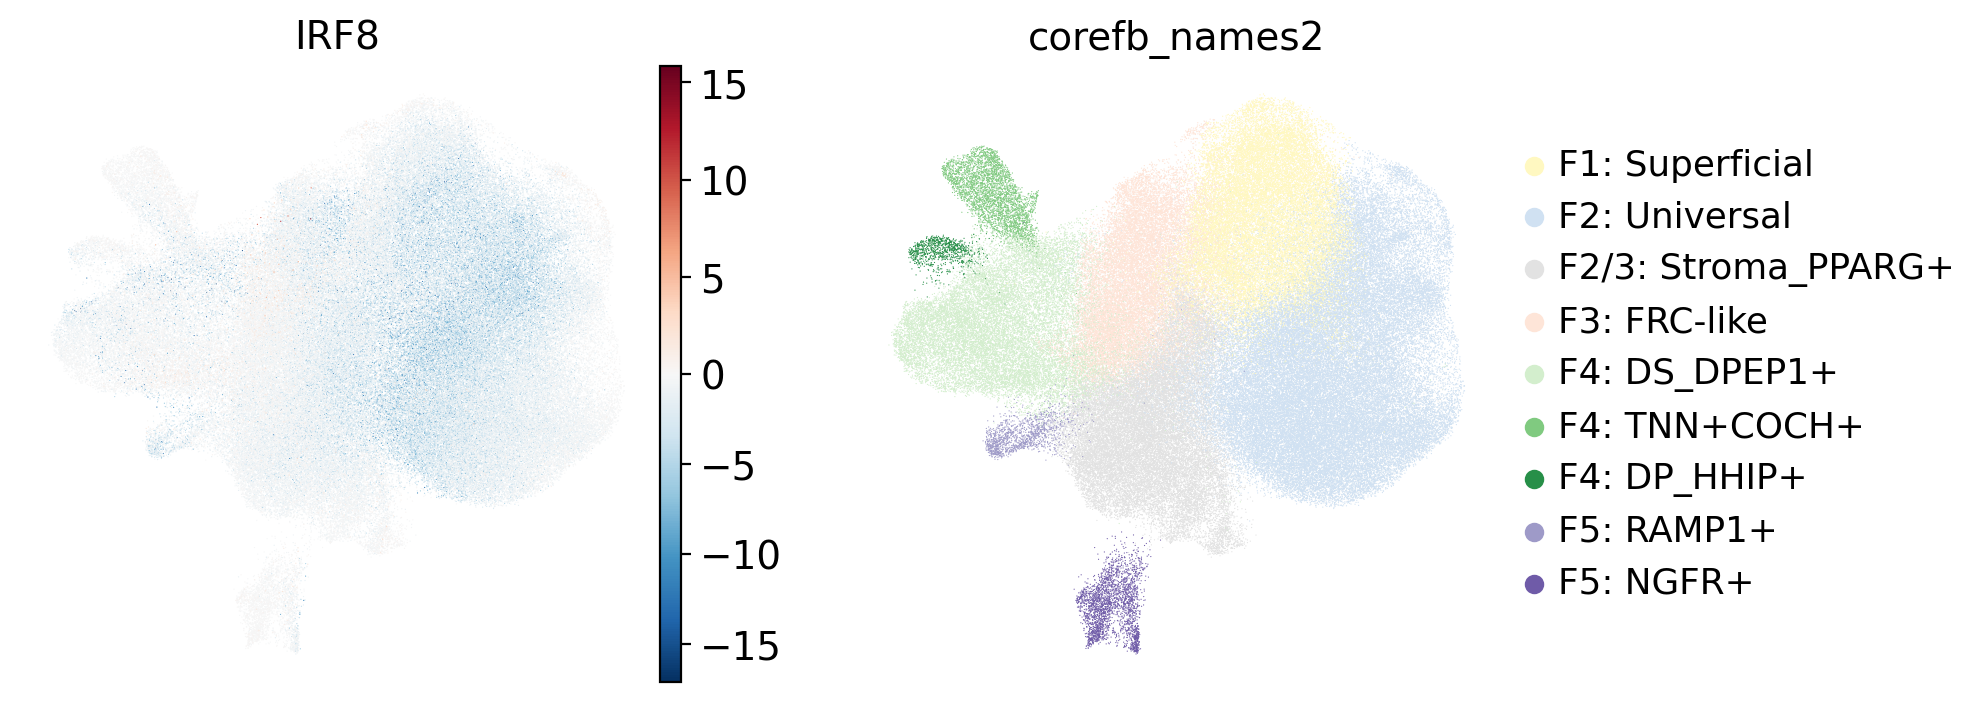

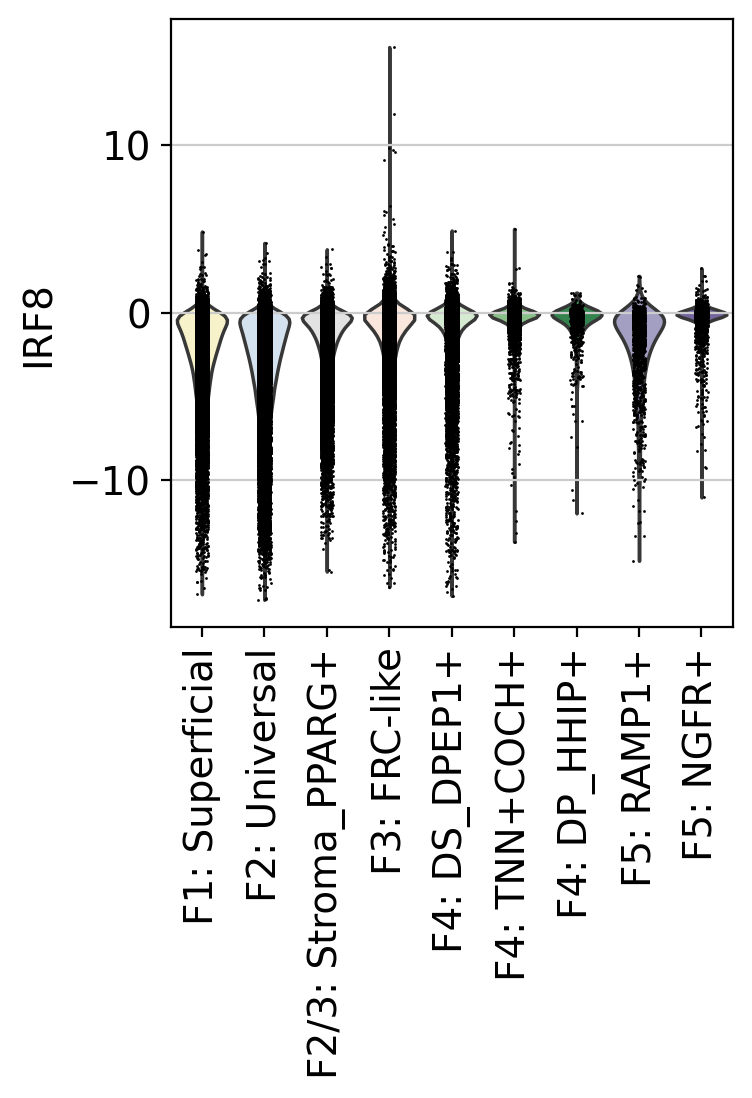

In [68]:

sc.pl.umap(acts, color=['IRF8', 'corefb_names2'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['IRF8'], groupby='corefb_names2', rotation=90)


In [69]:

df= dc.rank_sources_groups(acts, groupby='corefb_names2', reference='rest', method='t-test_overestim_var')
df

group reference   names   statistic  meanchange  \
0     F1: Superficial      rest   PITX2  102.755155    0.492025   
1     F1: Superficial      rest   RUNX2   76.572876    1.515907   
2     F1: Superficial      rest   SMAD3   72.870866    1.830447   
3     F1: Superficial      rest  POU2F2   72.209335    1.023232   
4     F1: Superficial      rest   HOXA5   67.827866    0.493273   
...               ...       ...     ...         ...         ...   
4531       F5: RAMP1+      rest   DNMT1  -31.113136   -1.190418   
4532       F5: RAMP1+      rest  TWIST1  -31.123248   -1.546145   
4533       F5: RAMP1+      rest    JUNB  -31.318190   -2.728193   
4534       F5: RAMP1+      rest  TFAP2B  -31.973369   -3.771014   
4535       F5: RAMP1+      rest  TFAP2A  -35.315760   -2.050443   

              pvals      pvals_adj  
0      0.000000e+00   0.000000e+00  
1      0.000000e+00   0.000000e+00  
2      0.000000e+00   0.000000e+00  
3      0.000000e+00   0.000000e+00  
4      0.000000e+00   0.000000e+00  
...             ...            ...  
4531  8.564428e-183  1.438824e-180  
4532  5.714375e-176  5.760090e-174  
4533  1.102822e-181  1.389555e-179  
4534  1.568335e-187  3.952204e-185  
4535  5.188888e-221  2.615200e-218  

[4536 rows x 7 columns]

In [70]:

n_markers = 5
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'F1: Superficial': ['PITX2', 'RUNX2', 'SMAD3', 'POU2F2', 'HOXA5'],
 'F2/3: Stroma_PPARG+': ['APEX1', 'CEBPA', 'RFX5', 'CIITA', 'FLI1'],
 'F2: Universal': ['ZFPM2', 'SPIB', 'KLF5', 'SKIL', 'FOSL1'],
 'F3: FRC-like': ['NR1H3', 'NFKB1', 'NFKB', 'RELB', 'RELA'],
 'F4: DP_HHIP+': ['GSC', 'FOXH1', 'GRHL3', 'NKX3-2', 'PAX2'],
 'F4: DS_DPEP1+': ['NFATC1', 'FOXH1', 'TCF7', 'NR4A2', 'PAX8'],
 'F4: TNN+COCH+': ['IRF8', 'ZNF382', 'MYF5', 'RUNX3', 'MYOD1'],
 'F5: NGFR+': ['TP63', 'APEX1', 'CTNNB1', 'TP73', 'CIITA'],
 'F5: RAMP1+': ['PDX1', 'BARX2', 'TP73', 'TBX2', 'CIITA']}

In [ ]:
"""
6000 genes


"""

In [15]:
"""
2000 genes

{'F1: Superficial': ['POU2F2', 'RUNX2', 'SMAD3', 'PITX2', 'RARG'],
 'F2/3: Stroma_PPARG+': ['APEX1', 'CEBPA', 'TP63', 'RFX5', 'TP73'],
 'F2: Universal': ['SPIB', 'KLF5', 'SKIL', 'FOSL1', 'JUNB'],
 'F3: FRC-like': ['NFKB', 'NFKB1', 'NR1H3', 'RELA', 'ATF4'],
 'F4: DP_HHIP+': ['GSC', 'FOXO3', 'TTF1', 'ID2', 'PPARG'],
 'F4: DS_DPEP1+': ['MEF2A', 'STAT6', 'NFATC1', 'SMAD3', 'NR4A2'],
 'F4: TNN+COCH+': ['IRF8', 'EGR2', 'MYOD1', 'HLX', 'ZNF382'],
 'F5: NGFR+': ['TP63', 'APEX1', 'CTNNB1', 'TP73', 'RFX5'],
 'F5: RAMP1+': ['PDX1', 'TP63', 'TP73', 'SOX10', 'APEX1']}
"""

"\n2000 genes\n\n{'F1: Superficial': ['POU2F2', 'RUNX2', 'SMAD3', 'PITX2', 'RARG'],\n 'F2/3: Stroma_PPARG+': ['APEX1', 'CEBPA', 'TP63', 'RFX5', 'TP73'],\n 'F2: Universal': ['SPIB', 'KLF5', 'SKIL', 'FOSL1', 'JUNB'],\n 'F3: FRC-like': ['NFKB', 'NFKB1', 'NR1H3', 'RELA', 'ATF4'],\n 'F4: DP_HHIP+': ['GSC', 'FOXO3', 'TTF1', 'ID2', 'PPARG'],\n 'F4: DS_DPEP1+': ['MEF2A', 'STAT6', 'NFATC1', 'SMAD3', 'NR4A2'],\n 'F4: TNN+COCH+': ['IRF8', 'EGR2', 'MYOD1', 'HLX', 'ZNF382'],\n 'F5: NGFR+': ['TP63', 'APEX1', 'CTNNB1', 'TP73', 'RFX5'],\n 'F5: RAMP1+': ['PDX1', 'TP63', 'TP73', 'SOX10', 'APEX1']}\n"

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


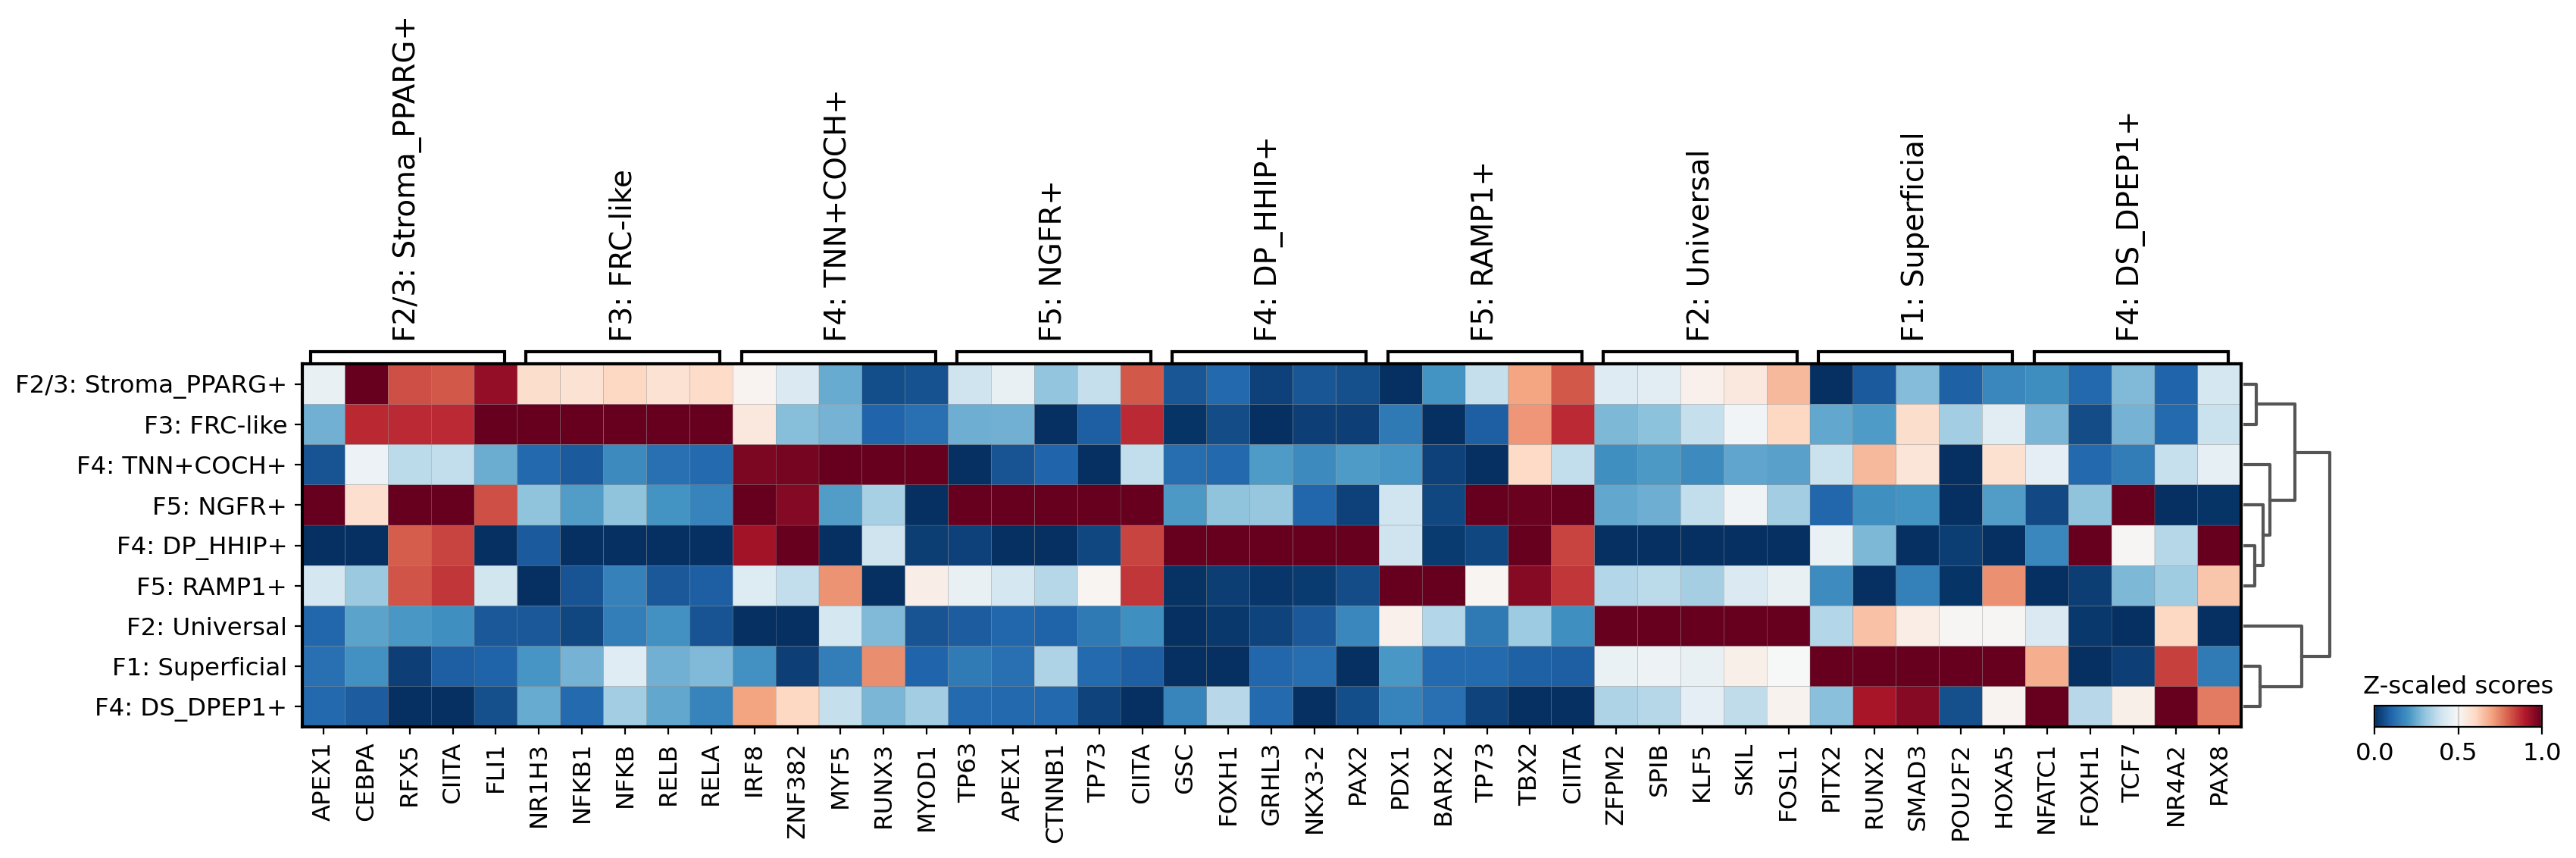

In [16]:
sc.pl.matrixplot(acts, source_markers, 'corefb_names2', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

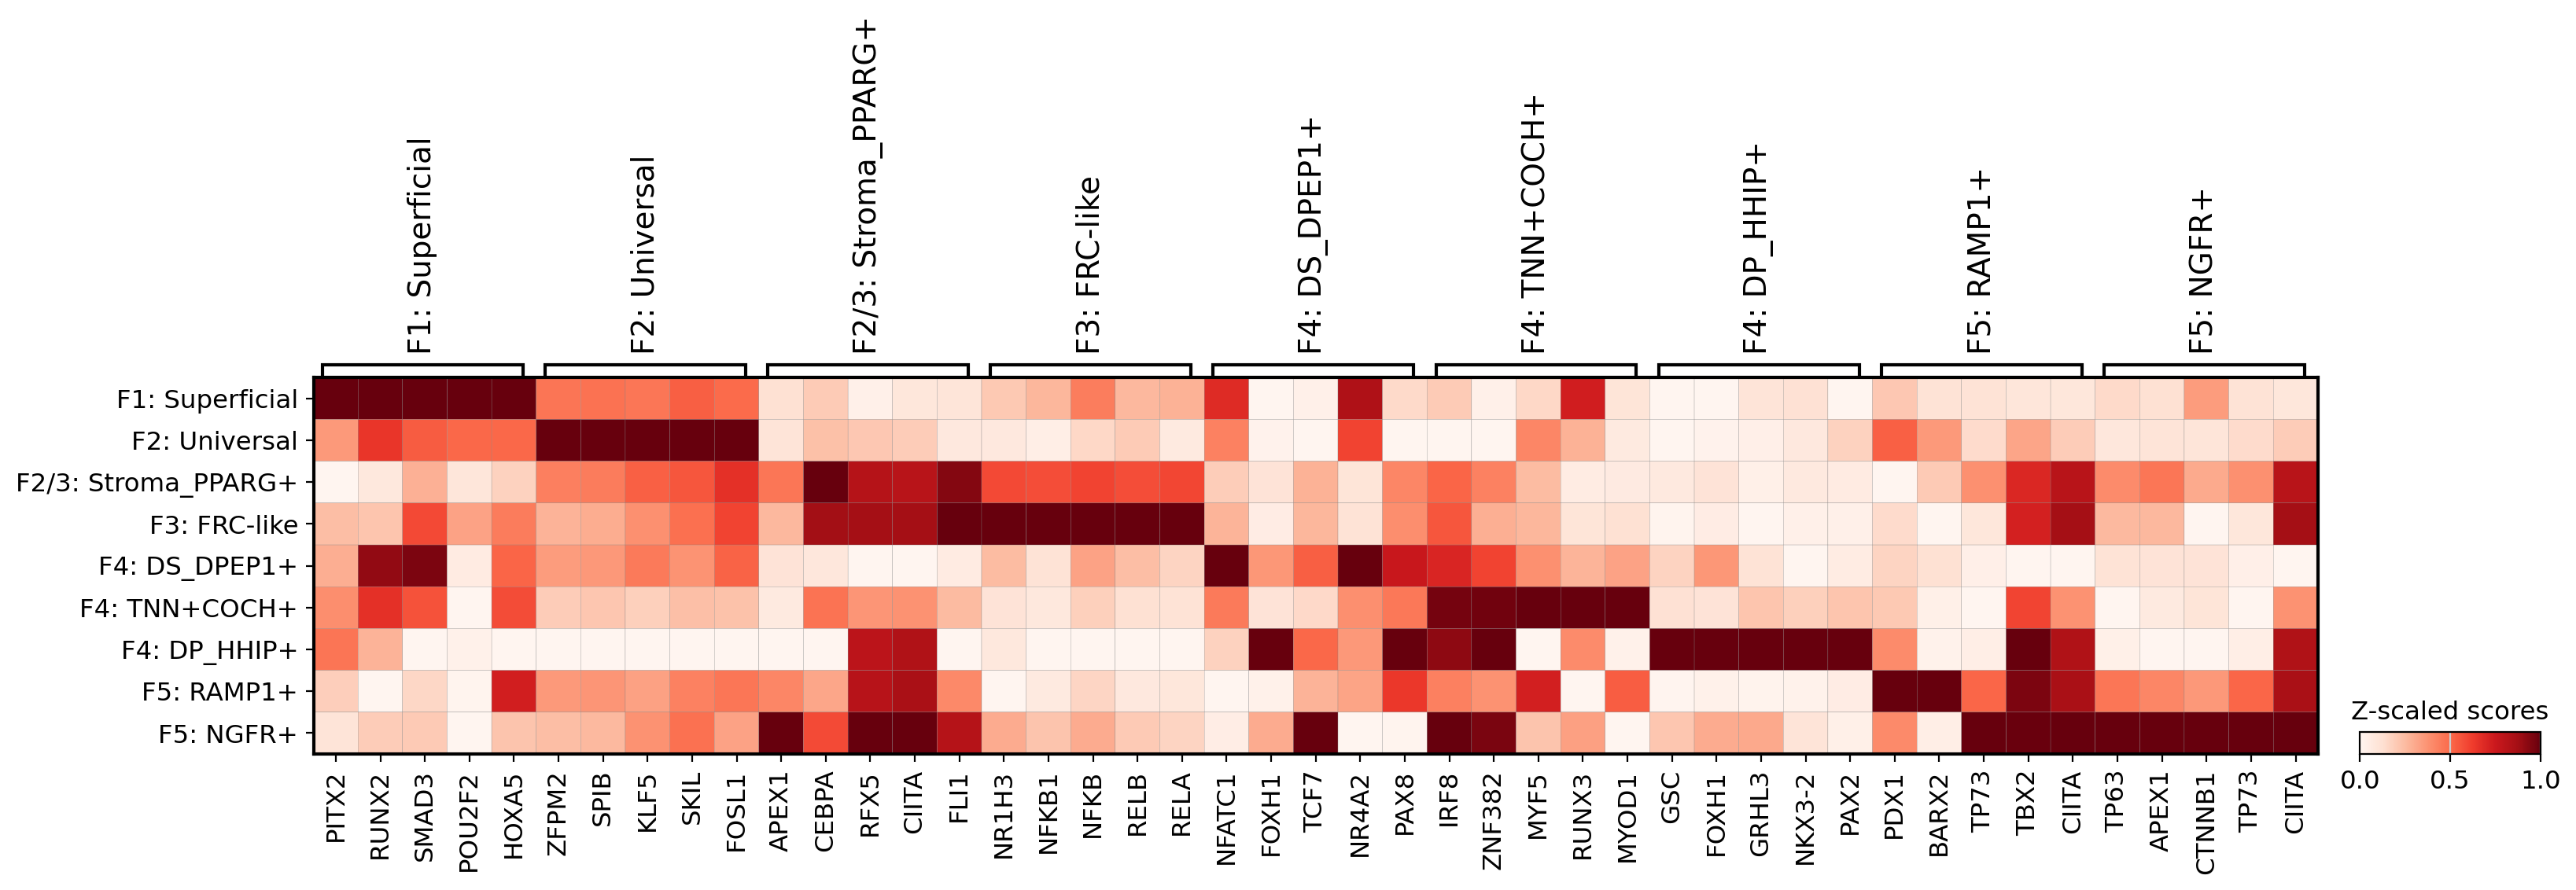

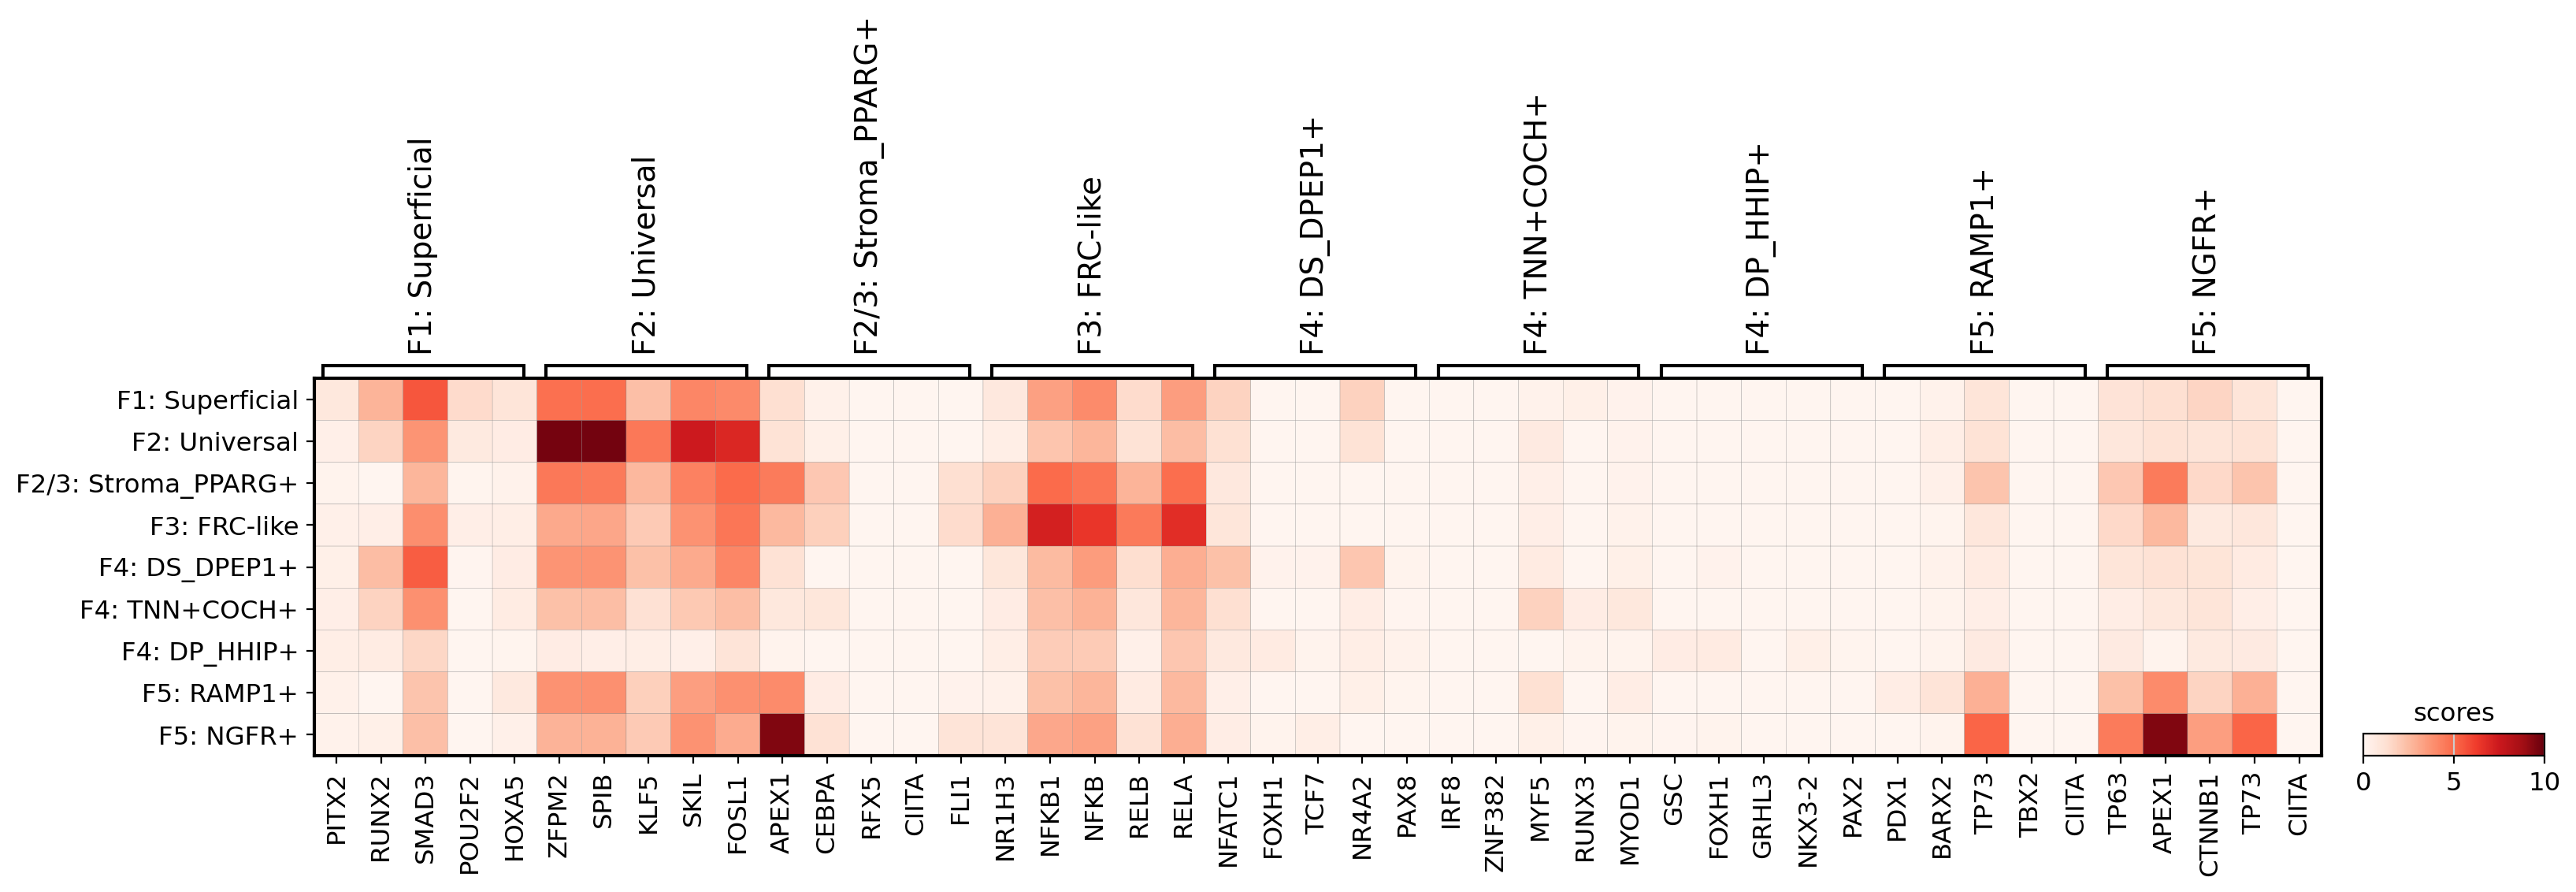

In [83]:

ORDER=['F1: Superficial',
 'F2: Universal',
        'F2/3: Stroma_PPARG+',
 'F3: FRC-like',
 'F4: DS_DPEP1+',
 'F4: TNN+COCH+',
 'F4: DP_HHIP+', 'F5: RAMP1+',
 'F5: NGFR+',

 #'F6: Inflammatory myofibroblast',
 #'F6: Myofibroblast',

 #'F7: Fascia-like myofibroblast',
 #'F_Fascia',
      ]
source_markers = {key: source_markers[key] for key in ORDER if key in source_markers}

# sc.pl.matrixplot(acts, source_markers, 'test13', dendrogram=True, standard_scale='var',
#                  colorbar_title='Z-scaled scores', cmap='Reds',categories_order=ORDER)
# sc.pl.matrixplot(acts, source_markers, 'test13', dendrogram=True,#standard_scale='var',
#                  colorbar_title='scores', cmap='Reds',categories_order=ORDER,
#                 vmax=15)

import pandas as pd

# Explicitly set category order
acts.obs['corefb_names2'] = pd.Categorical(acts.obs['corefb_names2'], categories=ORDER, ordered=True)

# Plot without dendrogram (ensures category order is used)
sc.pl.matrixplot(
    acts, source_markers, 'corefb_names2', 
    dendrogram=False,  # Disable automatic reordering
    standard_scale='var', colorbar_title='Z-scaled scores', 
    cmap='Reds', categories_order=ORDER
)

sc.pl.matrixplot(
    acts, source_markers, 'corefb_names2', 
    dendrogram=False,  # Disable automatic reordering
    colorbar_title='scores', cmap='Reds', 
    categories_order=ORDER, vmax=10,vmin=-0,
)
# sc.pl.matrixplot(acts, source_markers, 'corefb_names2', dendrogram=True, standard_scale='var',
#                  colorbar_title='Z-scaled scores', cmap='RdBu_r')

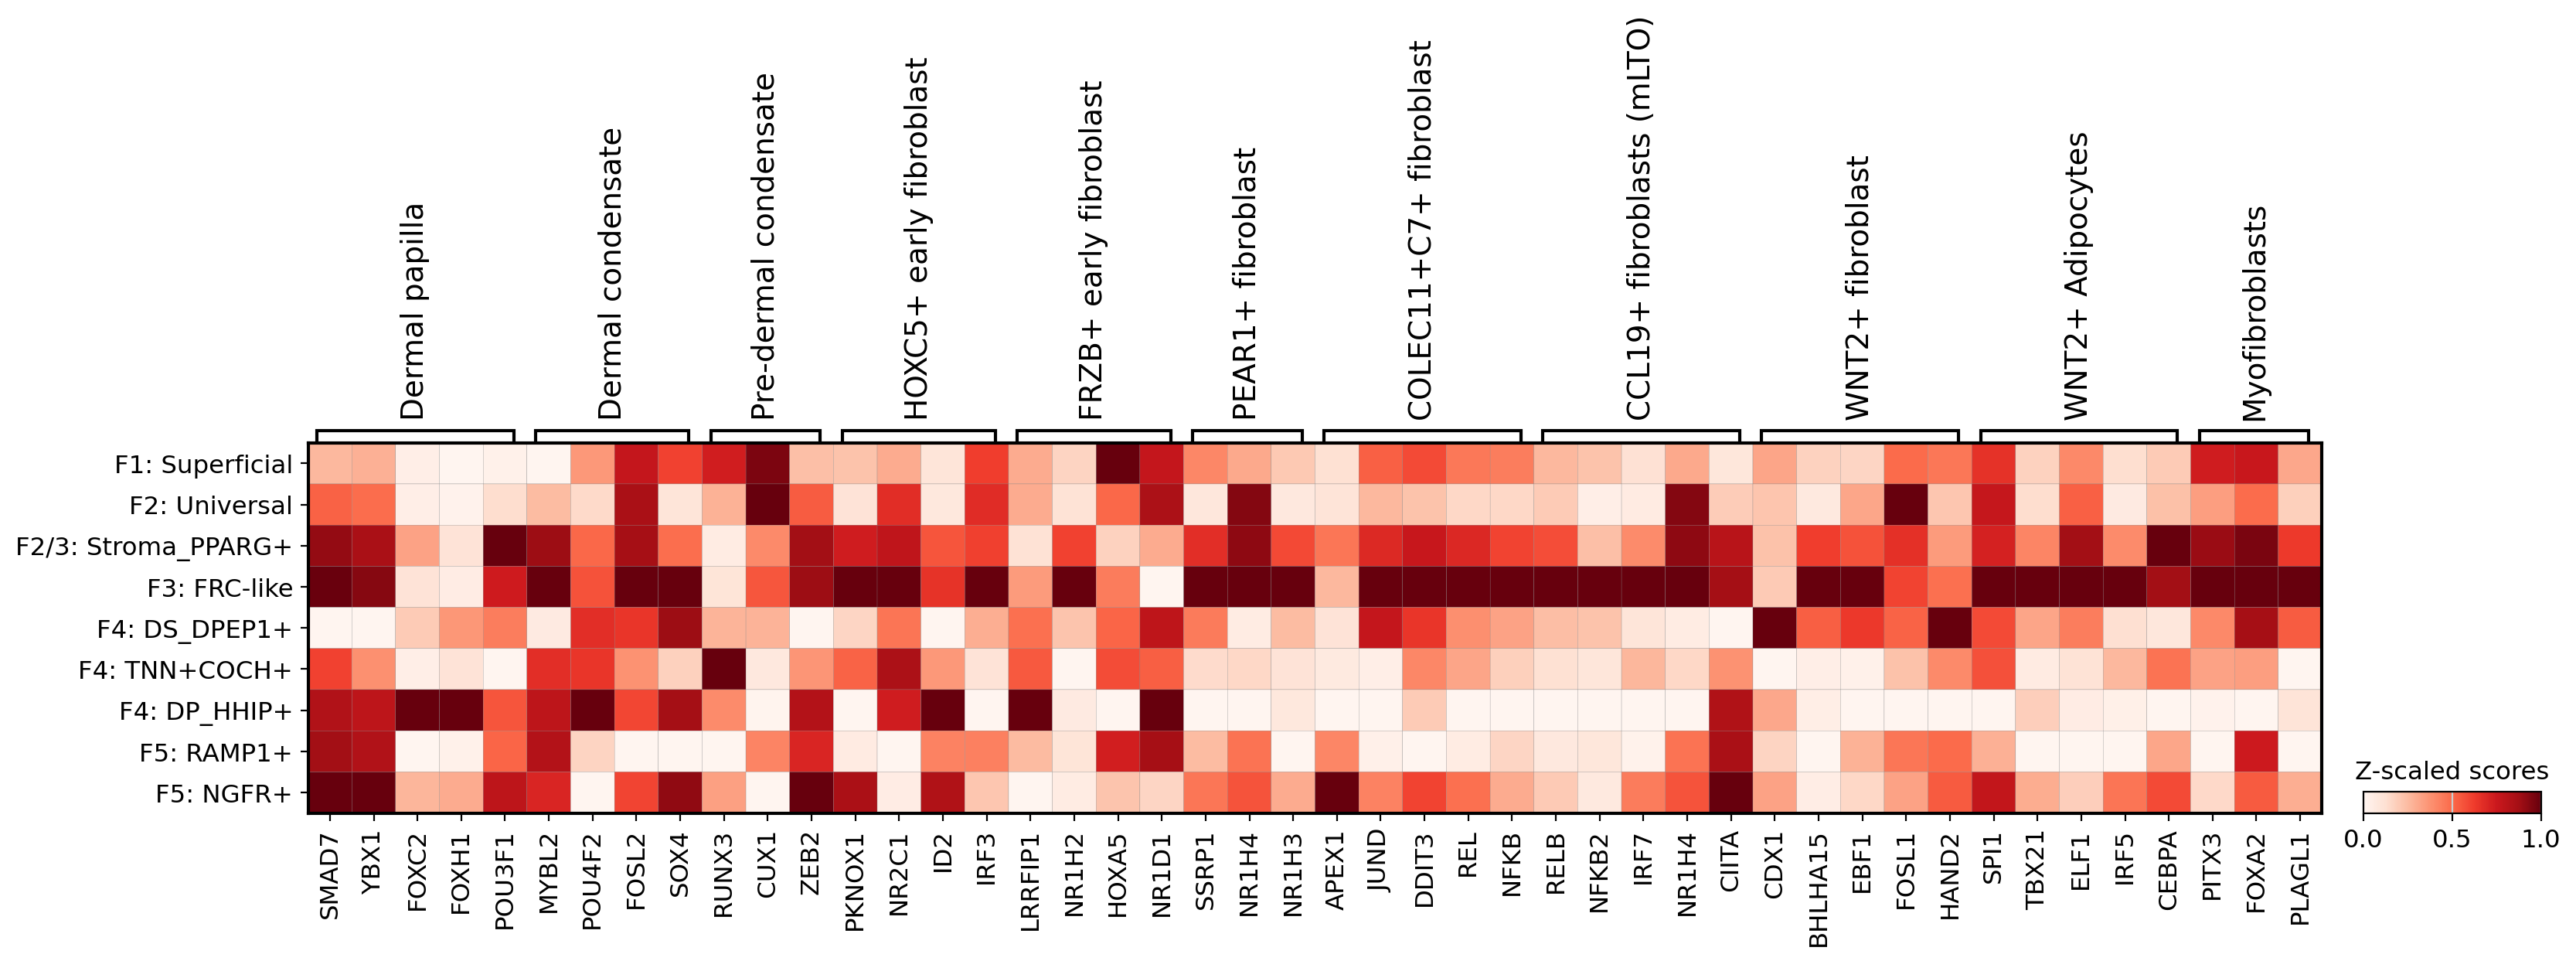

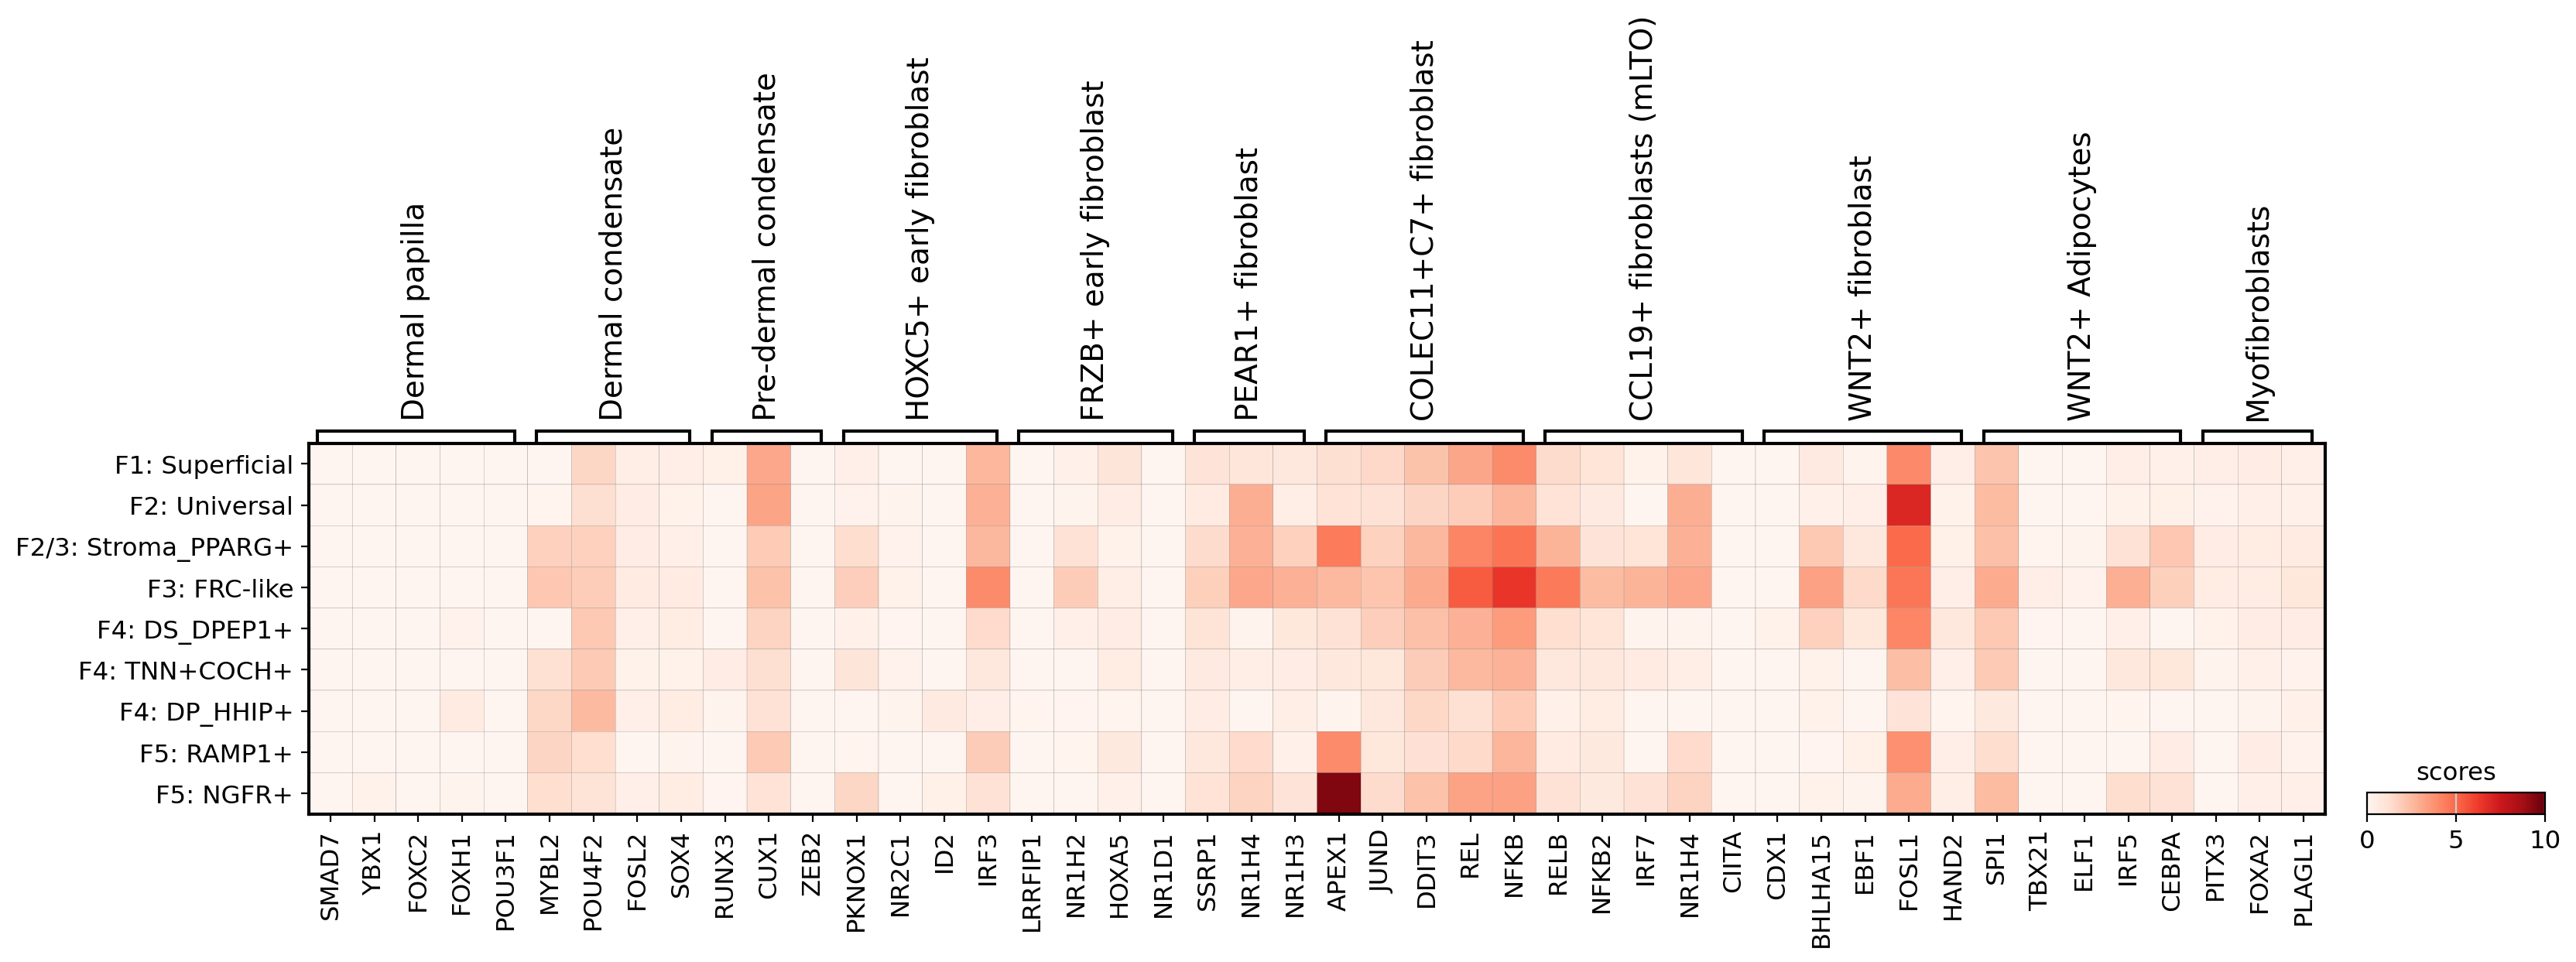

In [85]:
fetal_source_markers={'Dermal papilla': ['SMAD7', 'YBX1', 'FOXC2', 'FOXH1', 'POU3F1'],
 'Dermal condensate': ['MYBL2', 'POU4F2', 'FOSL2', 'SOX4', 'NRL'],
 'Pre-dermal condensate': ['HAND1', 'RUNX3', 'CUX1', 'ZEB2', 'IRF6'],
 'HOXC5+ early fibroblast': ['PKNOX1', 'IRF6', 'NR2C1', 'ID2', 'IRF3'],
 'FRZB+ early fibroblast': ['LRRFIP1', 'NR1H2', 'HOXA5', 'ZHX2', 'NR1D1'],
 'PEAR1+ fibroblast': ['AEBP1', 'SSRP1', 'NR1H4', 'MBD1', 'NR1H3'],
 'COLEC11+C7+ fibroblast': ['APEX1', 'JUND', 'DDIT3', 'REL', 'NFKB'],
 'CCL19+ fibroblasts (mLTO)': ['RELB', 'NFKB2', 'IRF7', 'NR1H4', 'CIITA'],
 'WNT2+ fibroblast': ['CDX1', 'BHLHA15', 'EBF1', 'FOSL1', 'HAND2'],
 'WNT2+ Adipocytes': ['SPI1', 'TBX21', 'ELF1', 'IRF5', 'CEBPA'],
 'Myofibroblasts': ['PITX3', 'FOXA2', 'CRX', 'ZKSCAN7', 'PLAGL1']}

fetal_source_markers = {
    key: [gene for gene in genes if gene in acts.var_names] 
    for key, genes in fetal_source_markers.items()
}

sc.pl.matrixplot(
    acts, fetal_source_markers, 'corefb_names2', 
    dendrogram=False,  # Disable automatic reordering
    standard_scale='var', colorbar_title='Z-scaled scores', 
    cmap='Reds', categories_order=ORDER
)

sc.pl.matrixplot(
    acts, fetal_source_markers, 'corefb_names2', 
    dendrogram=False,  # Disable automatic reordering
    colorbar_title='scores', cmap='Reds', 
    categories_order=ORDER, vmax=10,vmin=-0,
)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


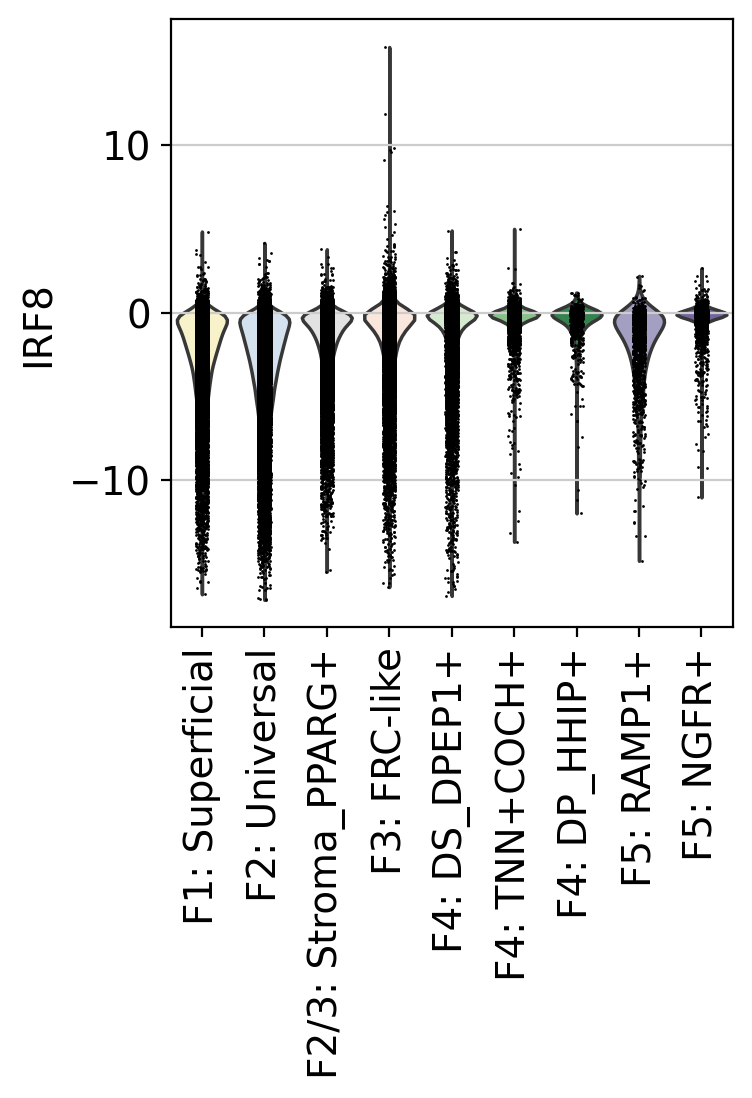

In [17]:
sc.pl.violin(acts, keys=['IRF8'], groupby='corefb_names2', rotation=90)


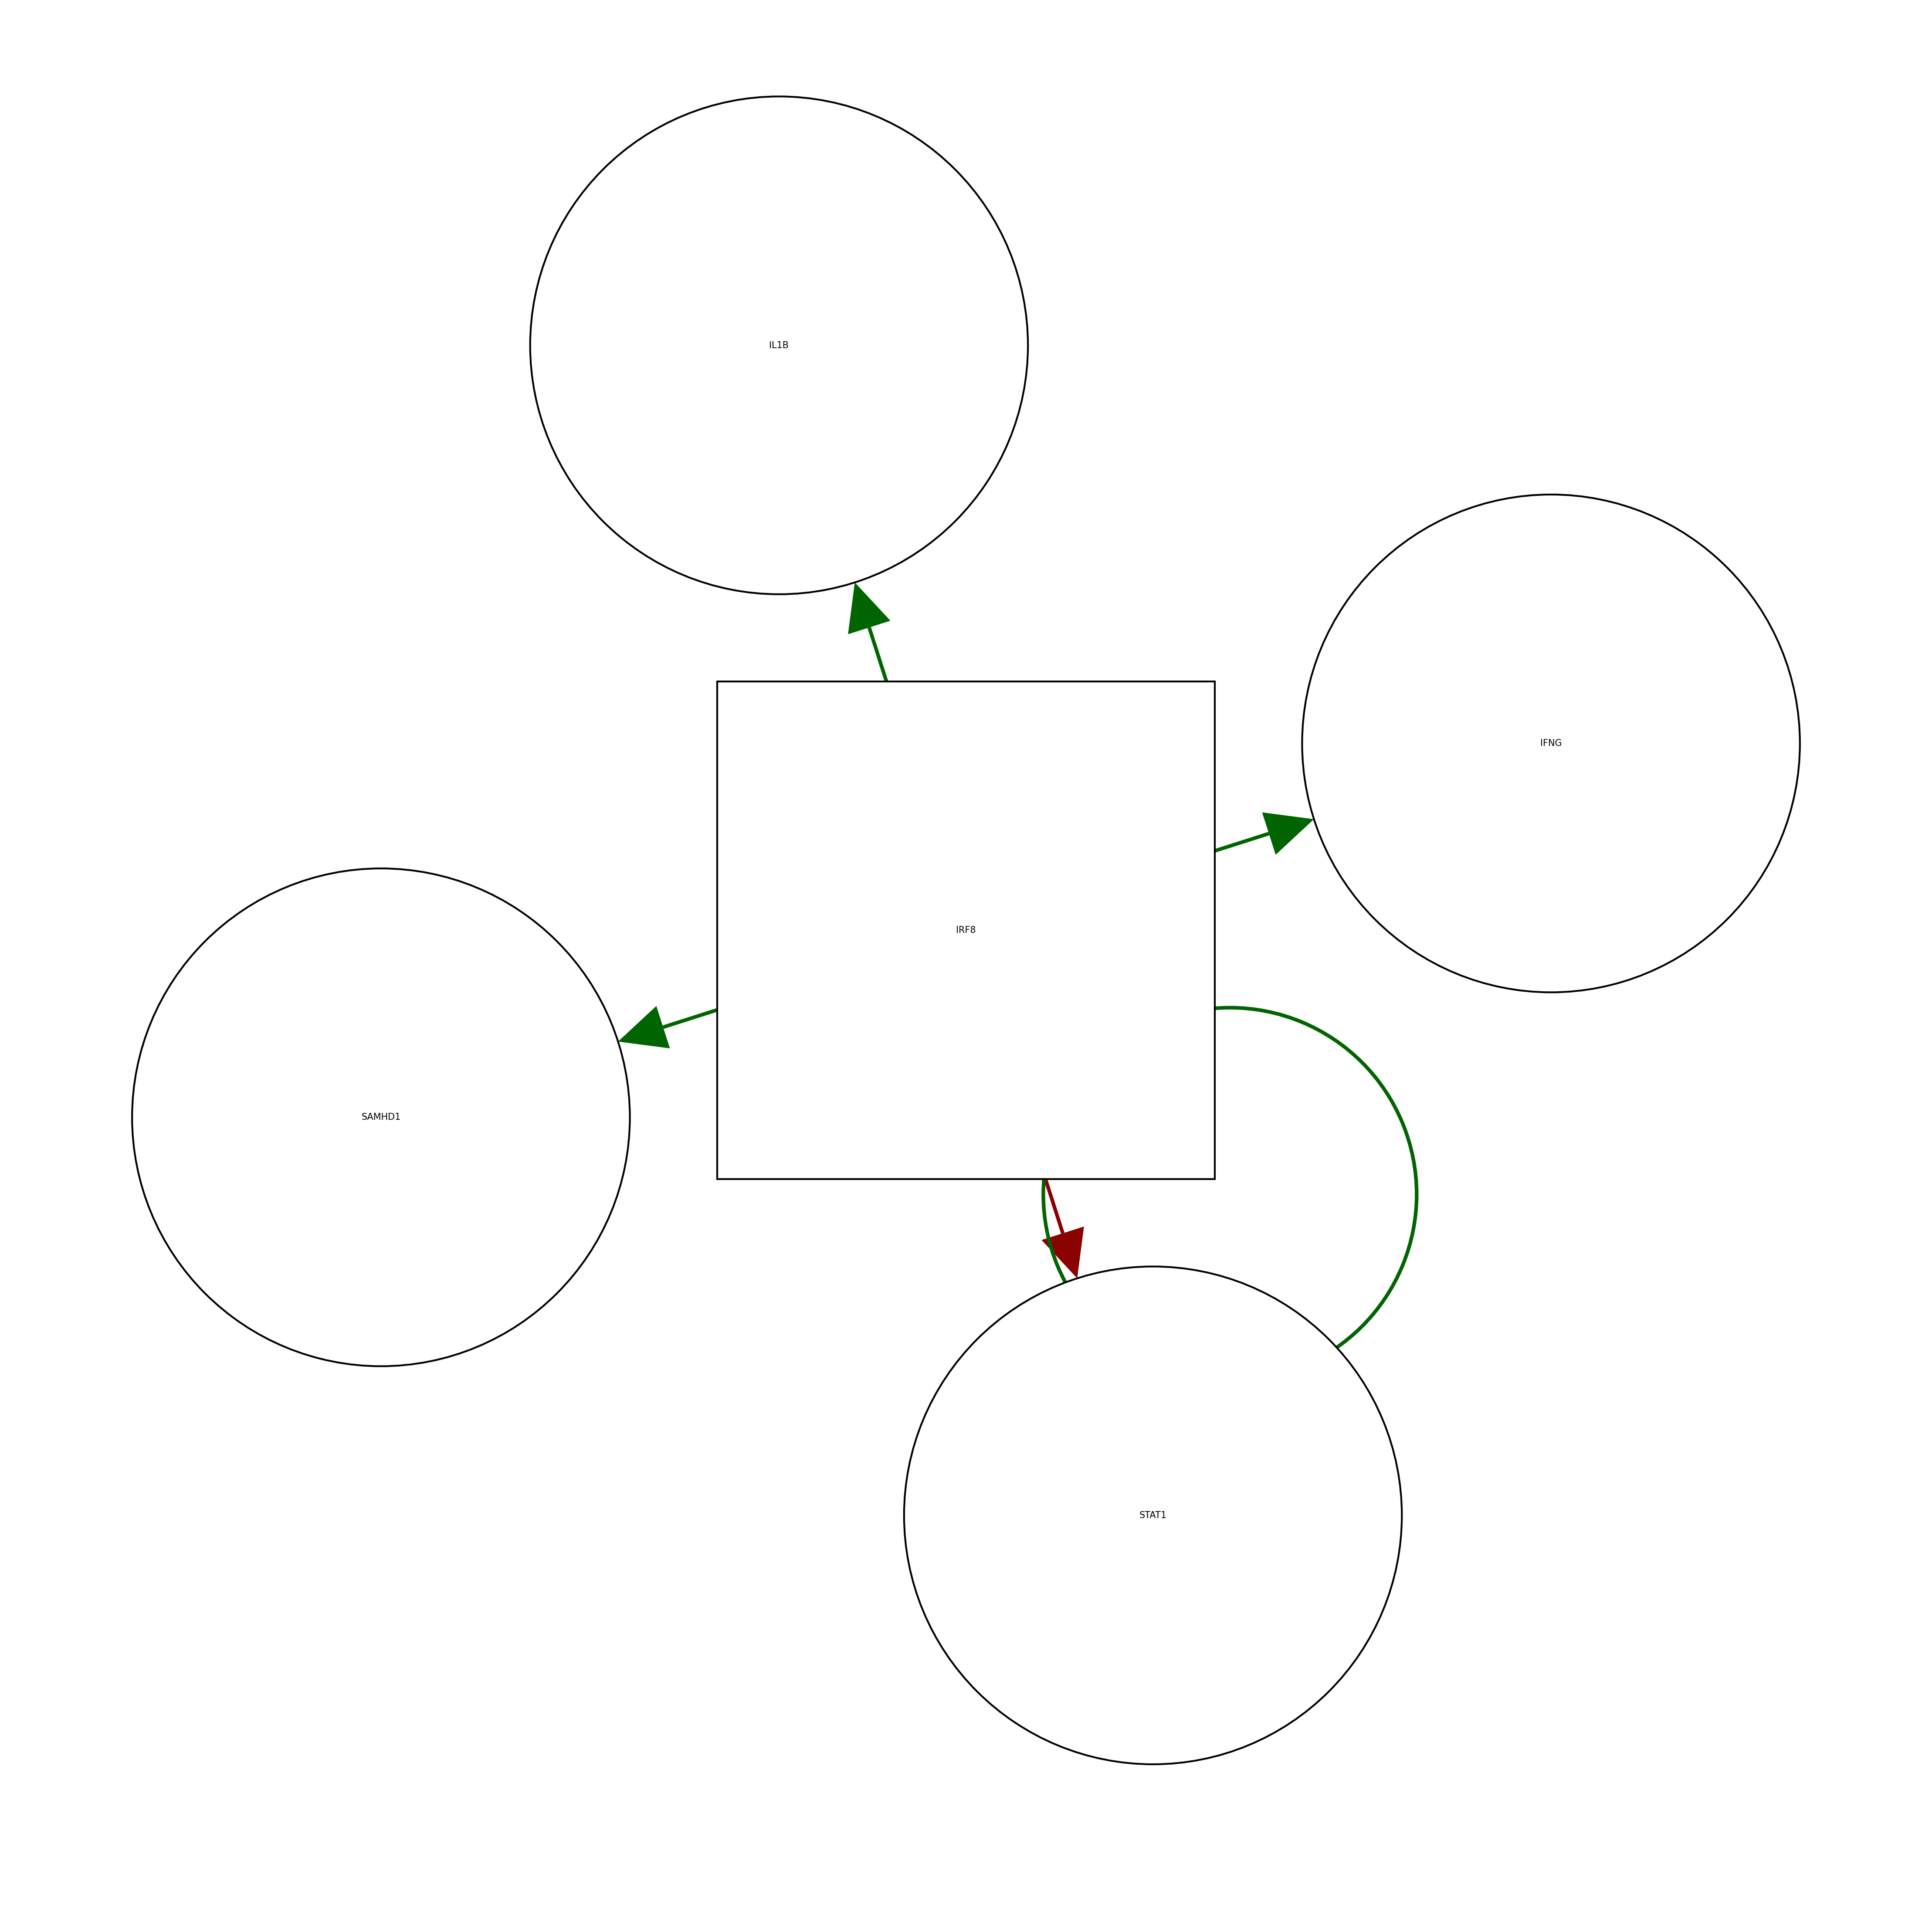

In [18]:

dc.plot_network(
    net=net,
    n_sources=['NKFB', 'IRF8'],
    n_targets=5,
    node_size=1,
    s_cmap='white',
    t_cmap='white',
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    figsize=(5, 5)
)

# Try on lesional data

In [19]:
stop

NameError: name 'stop' is not defined

In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline 

In [ ]:
sc.settings.figdir = "sfig5"

In [2]:

adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated9')
 


In [3]:
adata = adata[adata.obs['test13'].str.startswith(("F1", "F3", "F6", "F7", "F8"))]

In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [5]:
adata.raw = ad.AnnData(adata.layers["counts"].copy(), var=adata.var.copy(), obs=adata.obs.copy())


In [6]:
sc.pp.highly_variable_genes(adata,  
                                n_top_genes=6000, 
                                subset=True,
                                #batch_key="DonorID",
                                check_values=False,
                                #layer="normalized"
                               ) #100
adata.shape

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


(179090, 6000)

In [7]:
net = dc.get_collectri(organism='human', split_complexes=False)
net

source          target  weight  \
0         MYC            TERT       1   
1        SPI1           BGLAP       1   
2       SMAD3             JUN       1   
3       SMAD4             JUN       1   
4      STAT5A             IL2       1   
...       ...             ...     ...   
43173    NFKB  hsa-miR-143-3p       1   
43174     AP1     hsa-miR-206       1   
43175    NFKB   hsa-miR-21-5p       1   
43176    NFKB  hsa-miR-224-5p       1   
43177     AP1     hsa-miR-144       1   

                                                    PMID  
0      10022128;10491298;10606235;10637317;10723141;1...  
1                                               10022617  
2                                      10022869;12374795  
3                                      10022869;12374795  
4      10022878;11435608;17182565;17911616;22854263;2...  
...                                                  ...  
43173                                           19472311  
43174                                           19721712  
43175                                  20813833;22387281  
43176                                  23474441;23988648  
43177                                           23546882  

[43178 rows x 4 columns]

In [8]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)


adata

2059 features of mat are empty, they will be removed.
Running ulm on mat with 179090 samples and 34542 targets for 767 sources.


100%|██████████| 18/18 [01:53<00:00,  6.28s/it]


AnnData object with n_obs × n_vars = 179090 × 6000
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'leiden_res1', 'test', 'corefb_names', 'lvl3_annotation_uncert', 'lvl3_annotation_pred', 'leiden_res0.5', 'merged_annotations', 'test3', 'test4', 'test5', 'test6', 'leiden_res0.7', 'test7', 'lvl3_annotation_pred2', 'test8', 'test9', 'test10', 'test11', 'disease_category', 'macfb', 'macfb2', 'test12', 'test13', 'test14', 'test15', 'tes

In [9]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 179090 × 6000
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'leiden_res1', 'test', 'corefb_names', 'lvl3_annotation_uncert', 'lvl3_annotation_pred', 'leiden_res0.5', 'merged_annotations', 'test3', 'test4', 'test5', 'test6', 'leiden_res0.7', 'test7', 'lvl3_annotation_pred2', 'test8', 'test9', 'test10', 'test11', 'disease_category', 'macfb', 'macfb2', 'test12', 'test13', 'test14', 'test15', 'tes

In [10]:
acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts


AnnData object with n_obs × n_vars = 179090 × 767
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'leiden_res1', 'test', 'corefb_names', 'lvl3_annotation_uncert', 'lvl3_annotation_pred', 'leiden_res0.5', 'merged_annotations', 'test3', 'test4', 'test5', 'test6', 'leiden_res0.7', 'test7', 'lvl3_annotation_pred2', 'test8', 'test9', 'test10', 'test11', 'disease_category', 'macfb', 'macfb2', 'test12', 'test13', 'test14', 'test15', 'test

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


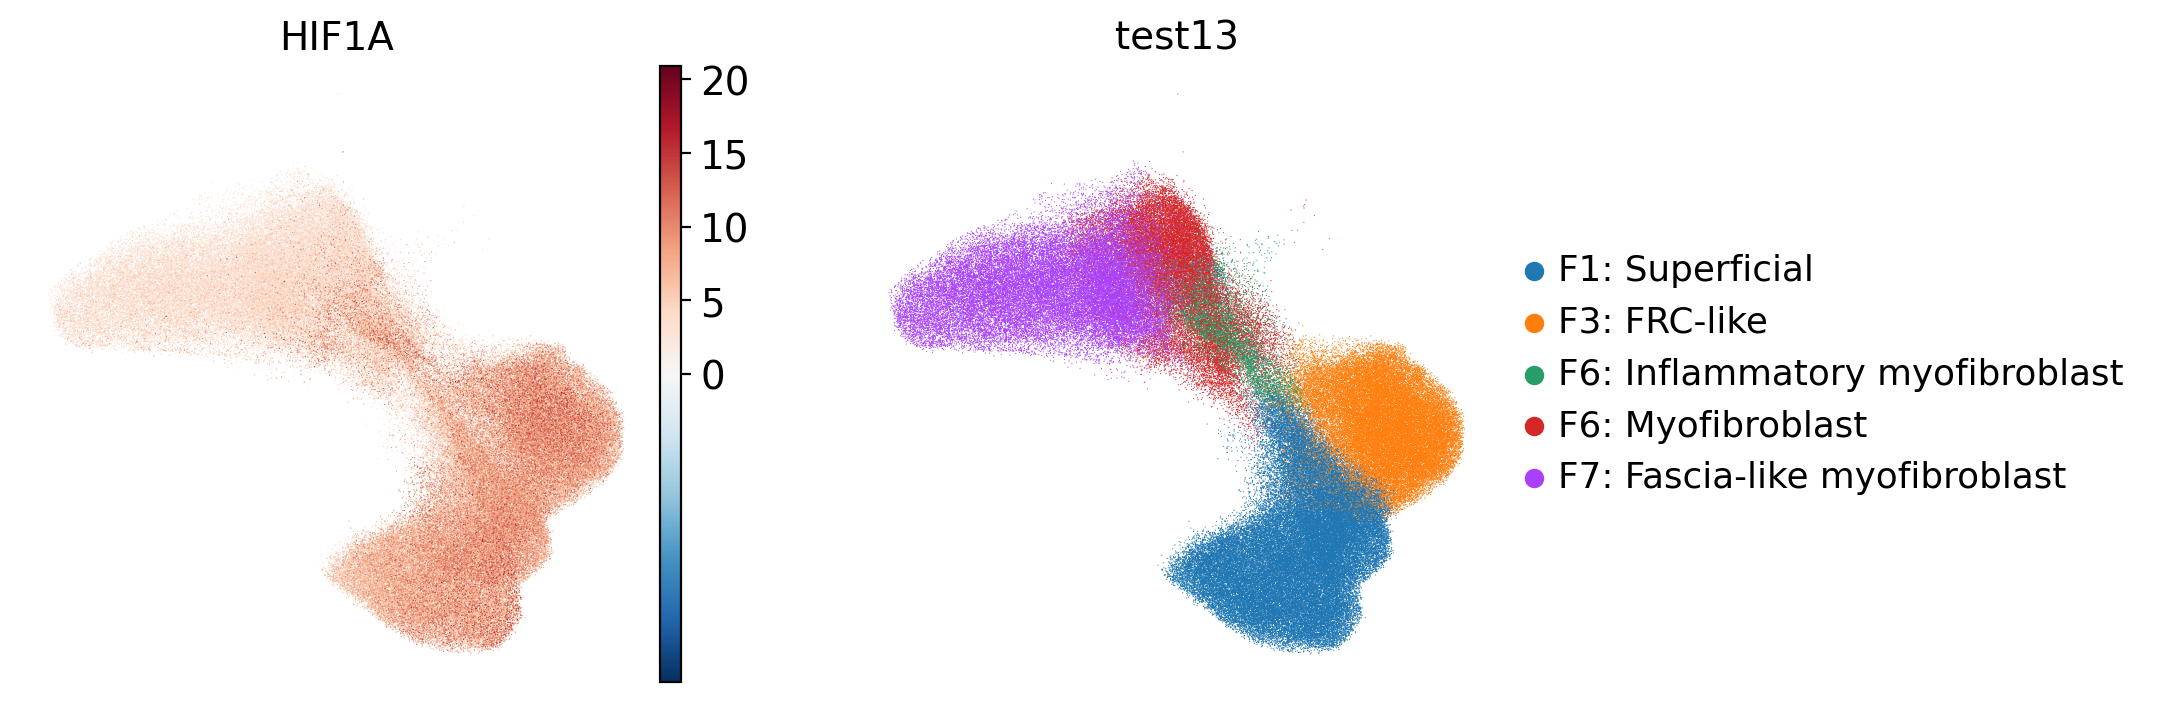

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


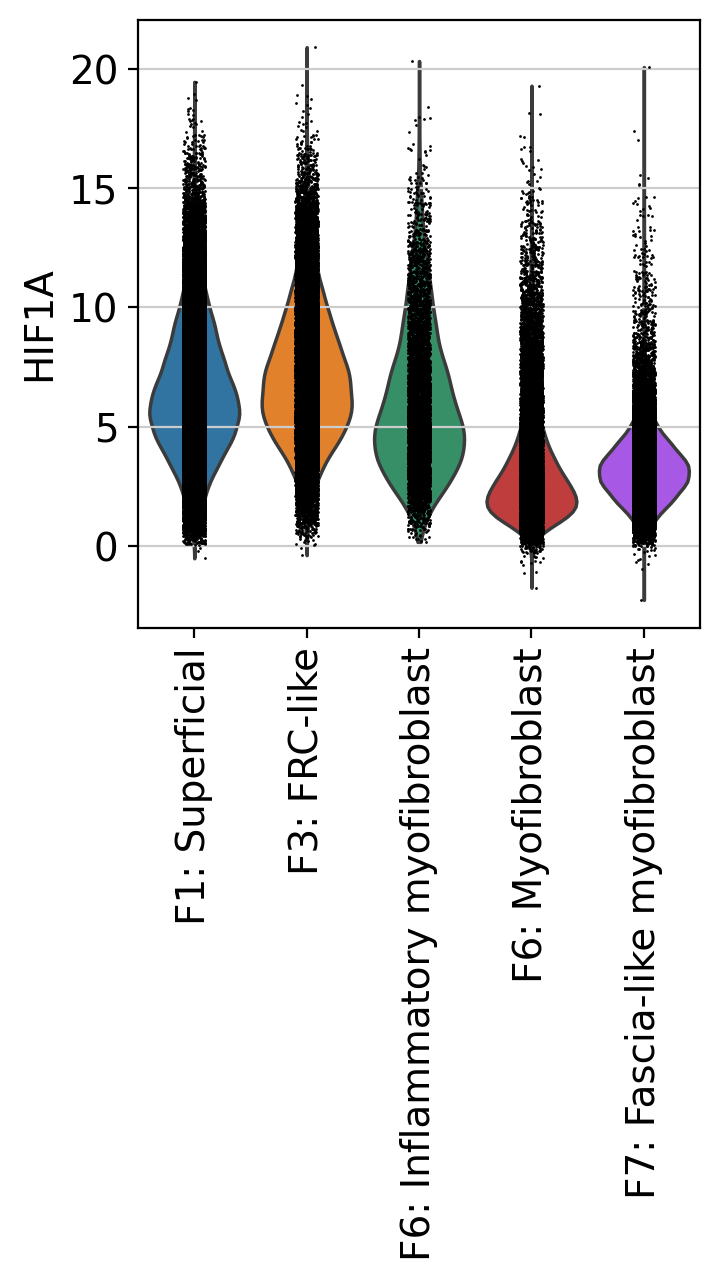

In [11]:
sc.pl.umap(acts, color=['HIF1A', 'test13'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['HIF1A'], groupby='test13', rotation=90)




/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1107: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to

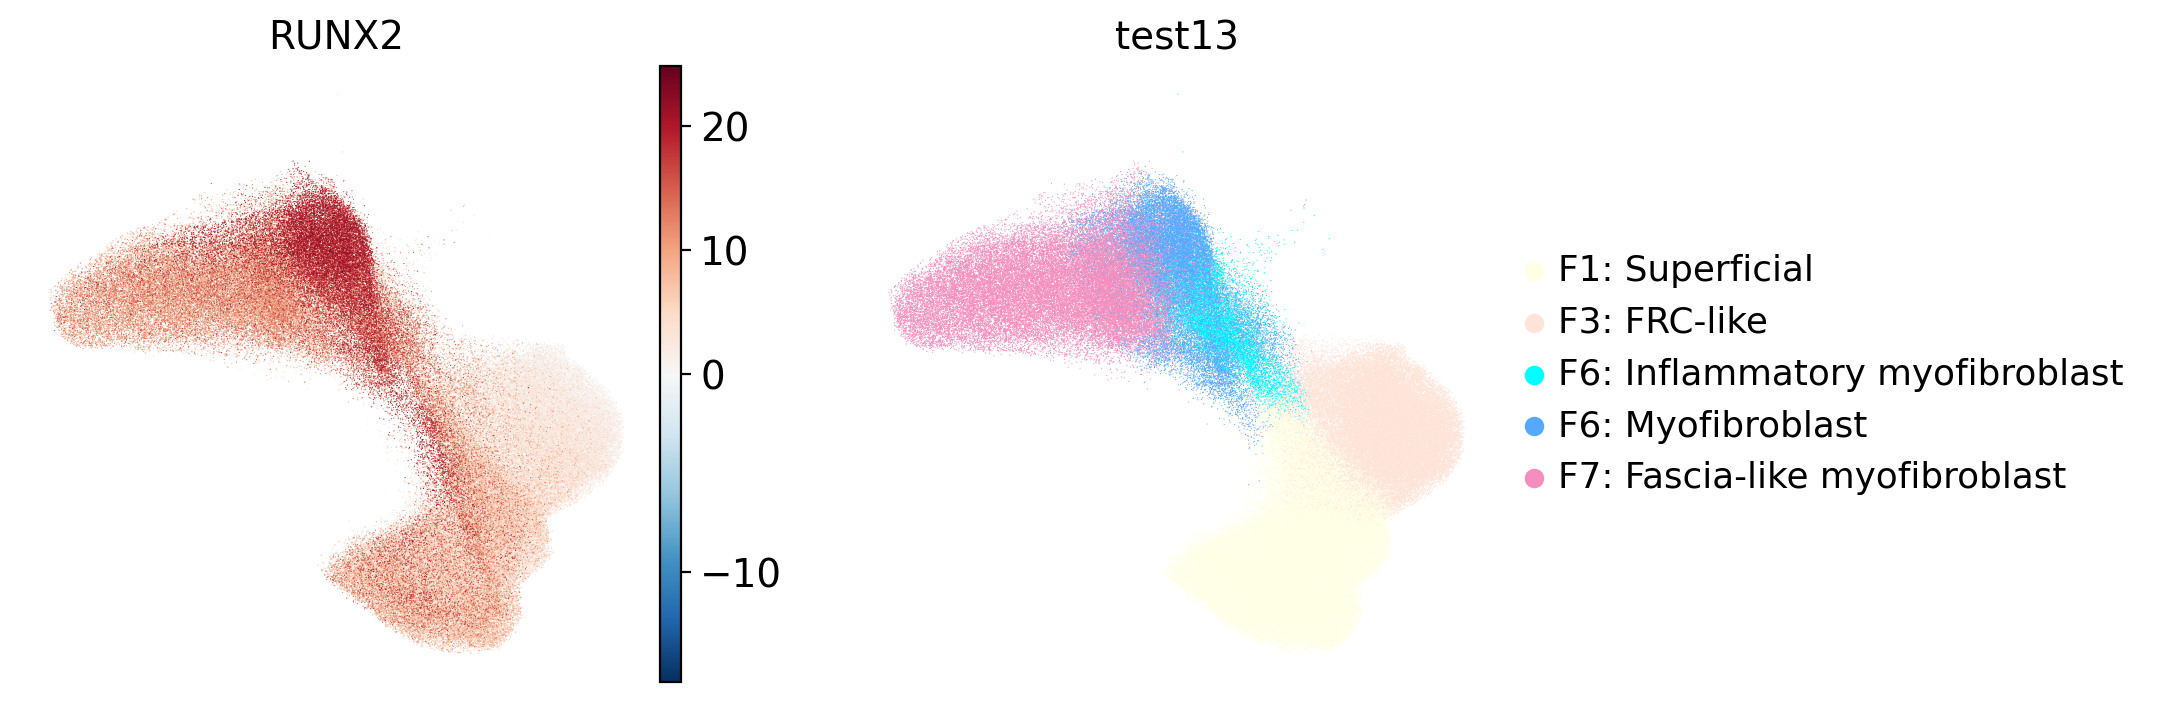

In [29]:
custom_colors = {
    "F1: Superficial": np.array([1.0, 1.0, 0.898, 1.0]),
   # "F1: Regenerative": np.array([0.996, 0.809, 0.396, 1.0]),
    #"F2: Universal": np.array([0.814, 0.884, 0.950, 1.0]),
    #"F2/3: Stroma_PPARG+": np.array([0.473, 0.712, 0.851, 1.0]),
    "F3: FRC-like": np.array([0.997, 0.896, 0.849, 1.0]),
  "F6: Inflammatory myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),
    "F6: Myofibroblast": np.array([0.333, 0.667, 1.0, 1.0]),
    "F7: Fascia-like myofibroblast": np.array([0.957, 0.557, 0.745, 1.0]),
}

acts.obs['test13'] = acts.obs['test13'].astype('category')   

# Match colors to these categories
acts.uns['test13_colors'] = [custom_colors.get(cat, '#808080') for cat in acts.obs['test13'].cat.categories]
sc.pl.umap(acts, color=['RUNX2', 'test13'], cmap='RdBu_r', vcenter=0)




In [ ]:
sc.pl.violin(acts, keys=['RUNX2'], groupby='test13', rotation=90)


In [13]:
df = dc.rank_sources_groups(acts, groupby='test13', reference='rest', method='t-test_overestim_var')
df

group reference   names   statistic  meanchange  \
0                   F1: Superficial      rest   FOXO1  179.041247    1.714764   
1                   F1: Superficial      rest    USF1  157.976755    2.305491   
2                   F1: Superficial      rest  ZBTB17  156.159456    0.767538   
3                   F1: Superficial      rest   HAND1  147.959859    0.417608   
4                   F1: Superficial      rest    ESR2  145.920883    1.699781   
...                             ...       ...     ...         ...         ...   
3830  F7: Fascia-like myofibroblast      rest    USF1 -175.248501   -2.826397   
3831  F7: Fascia-like myofibroblast      rest  STAT5A -186.645729   -2.614457   
3832  F7: Fascia-like myofibroblast      rest   FOXQ1 -188.575020   -1.776227   
3833  F7: Fascia-like myofibroblast      rest   FOXO3 -209.137076   -2.543314   
3834  F7: Fascia-like myofibroblast      rest   FOXO1 -212.346984   -2.209024   

      pvals  pvals_adj  
0       0.0        0.0  
1       0.0        0.0  
2       0.0        0.0  
3       0.0        0.0  
4       0.0        0.0  
...     ...        ...  
3830    0.0        0.0  
3831    0.0        0.0  
3832    0.0        0.0  
3833    0.0        0.0  
3834    0.0        0.0  

[3835 rows x 7 columns]

In [25]:
n_markers = 5
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'F1: Superficial': ['FOXO1', 'USF1', 'ZBTB17', 'HAND1', 'ESR2'],
 'F3: FRC-like': ['NR1H4', 'IRF1', 'CIITA', 'MYBL2', 'NFKB1'],
 'F6: Inflammatory myofibroblast': ['FOXH1', 'KAT7', 'LHX3', 'MKX', 'TEAD1'],
 'F6: Myofibroblast': ['ZBTB7B', 'SCX', 'ZNF148', 'NOTCH1', 'FOXN1'],
 'F7: Fascia-like myofibroblast': ['HAND2', 'CDX1', 'ID1', 'EBF1', 'TWIST2']}

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


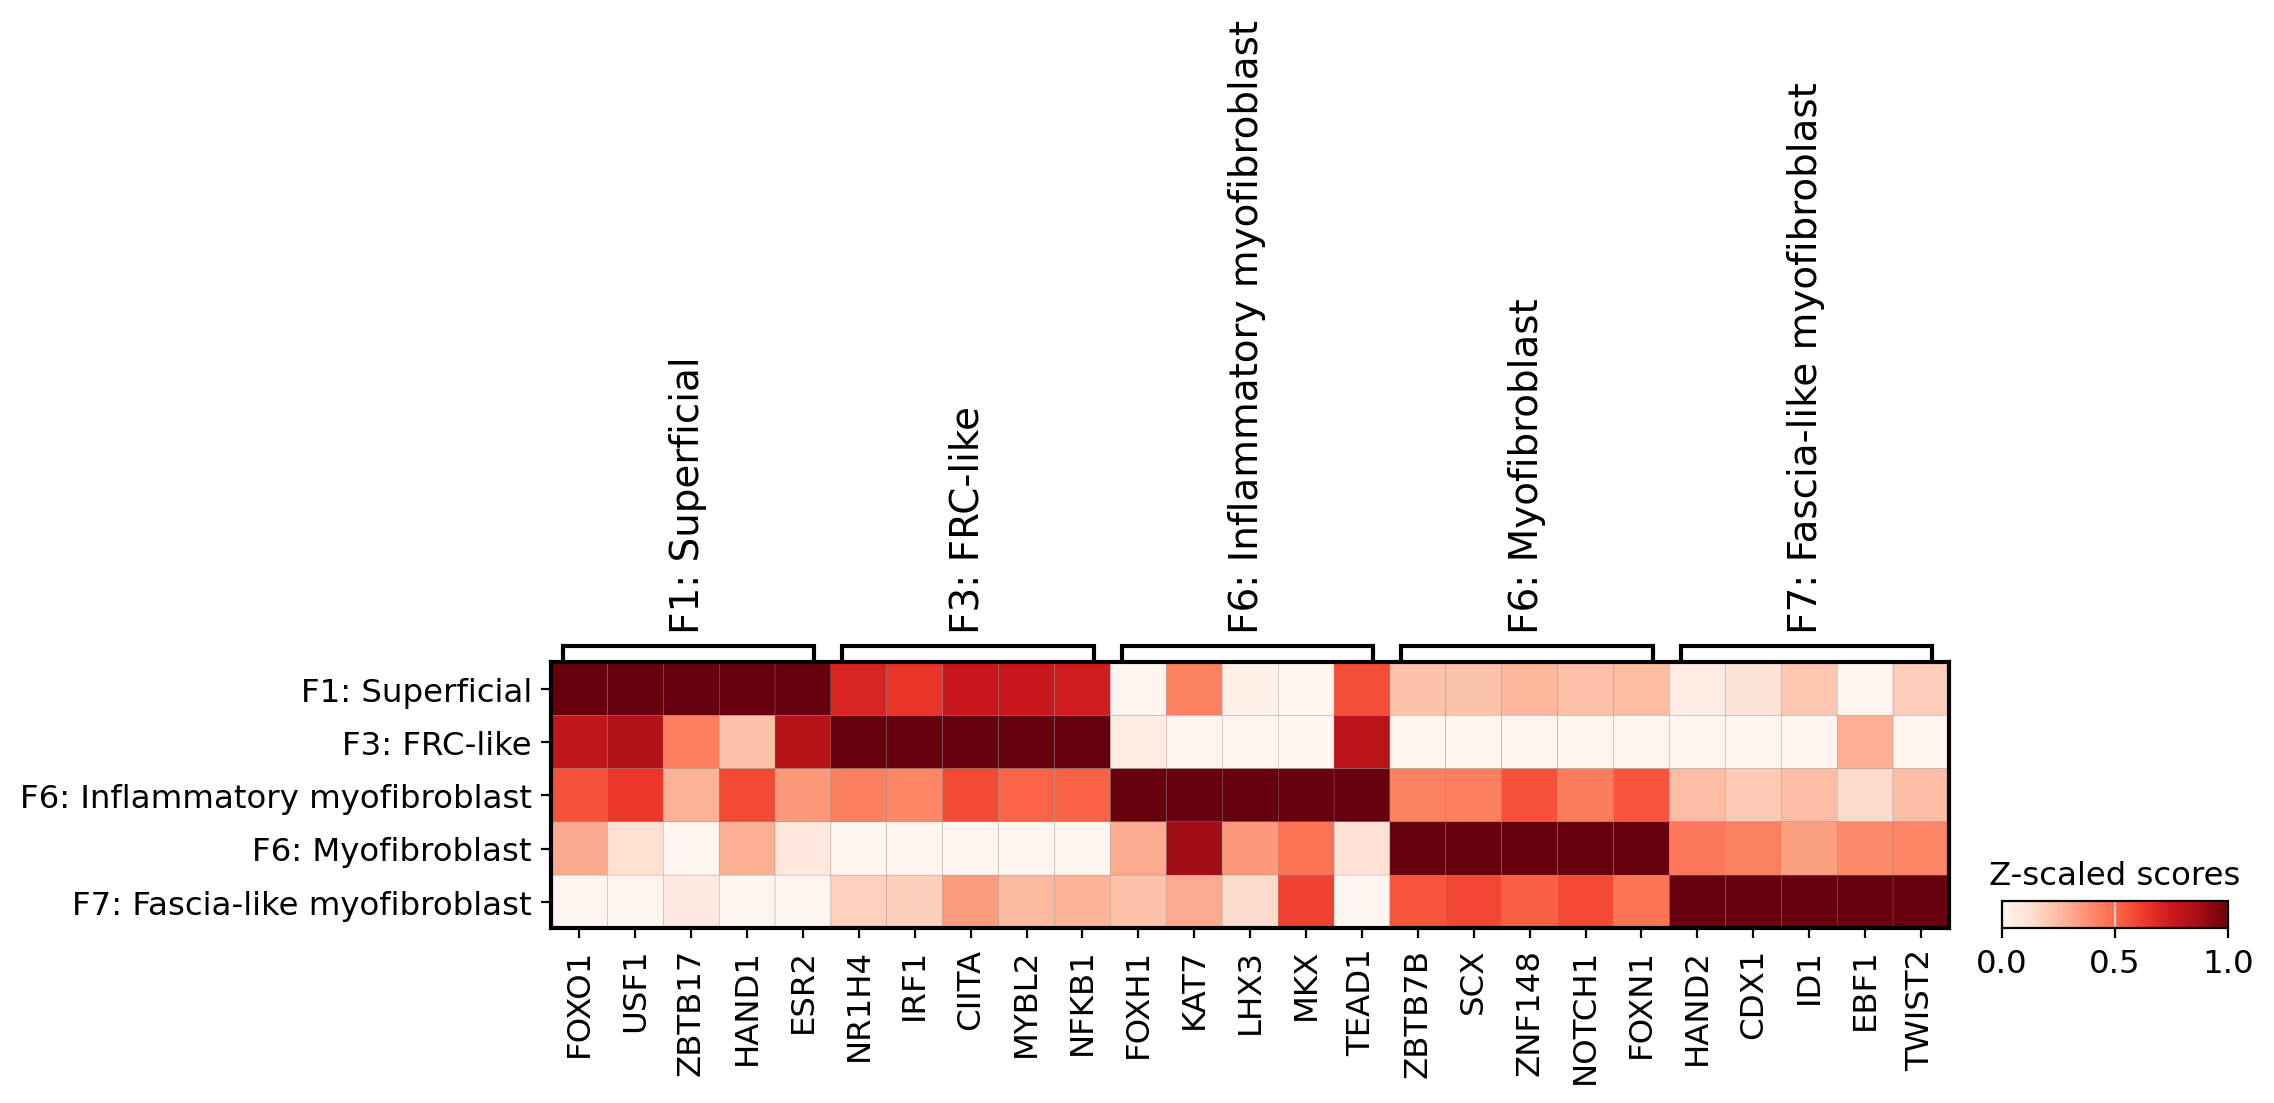

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


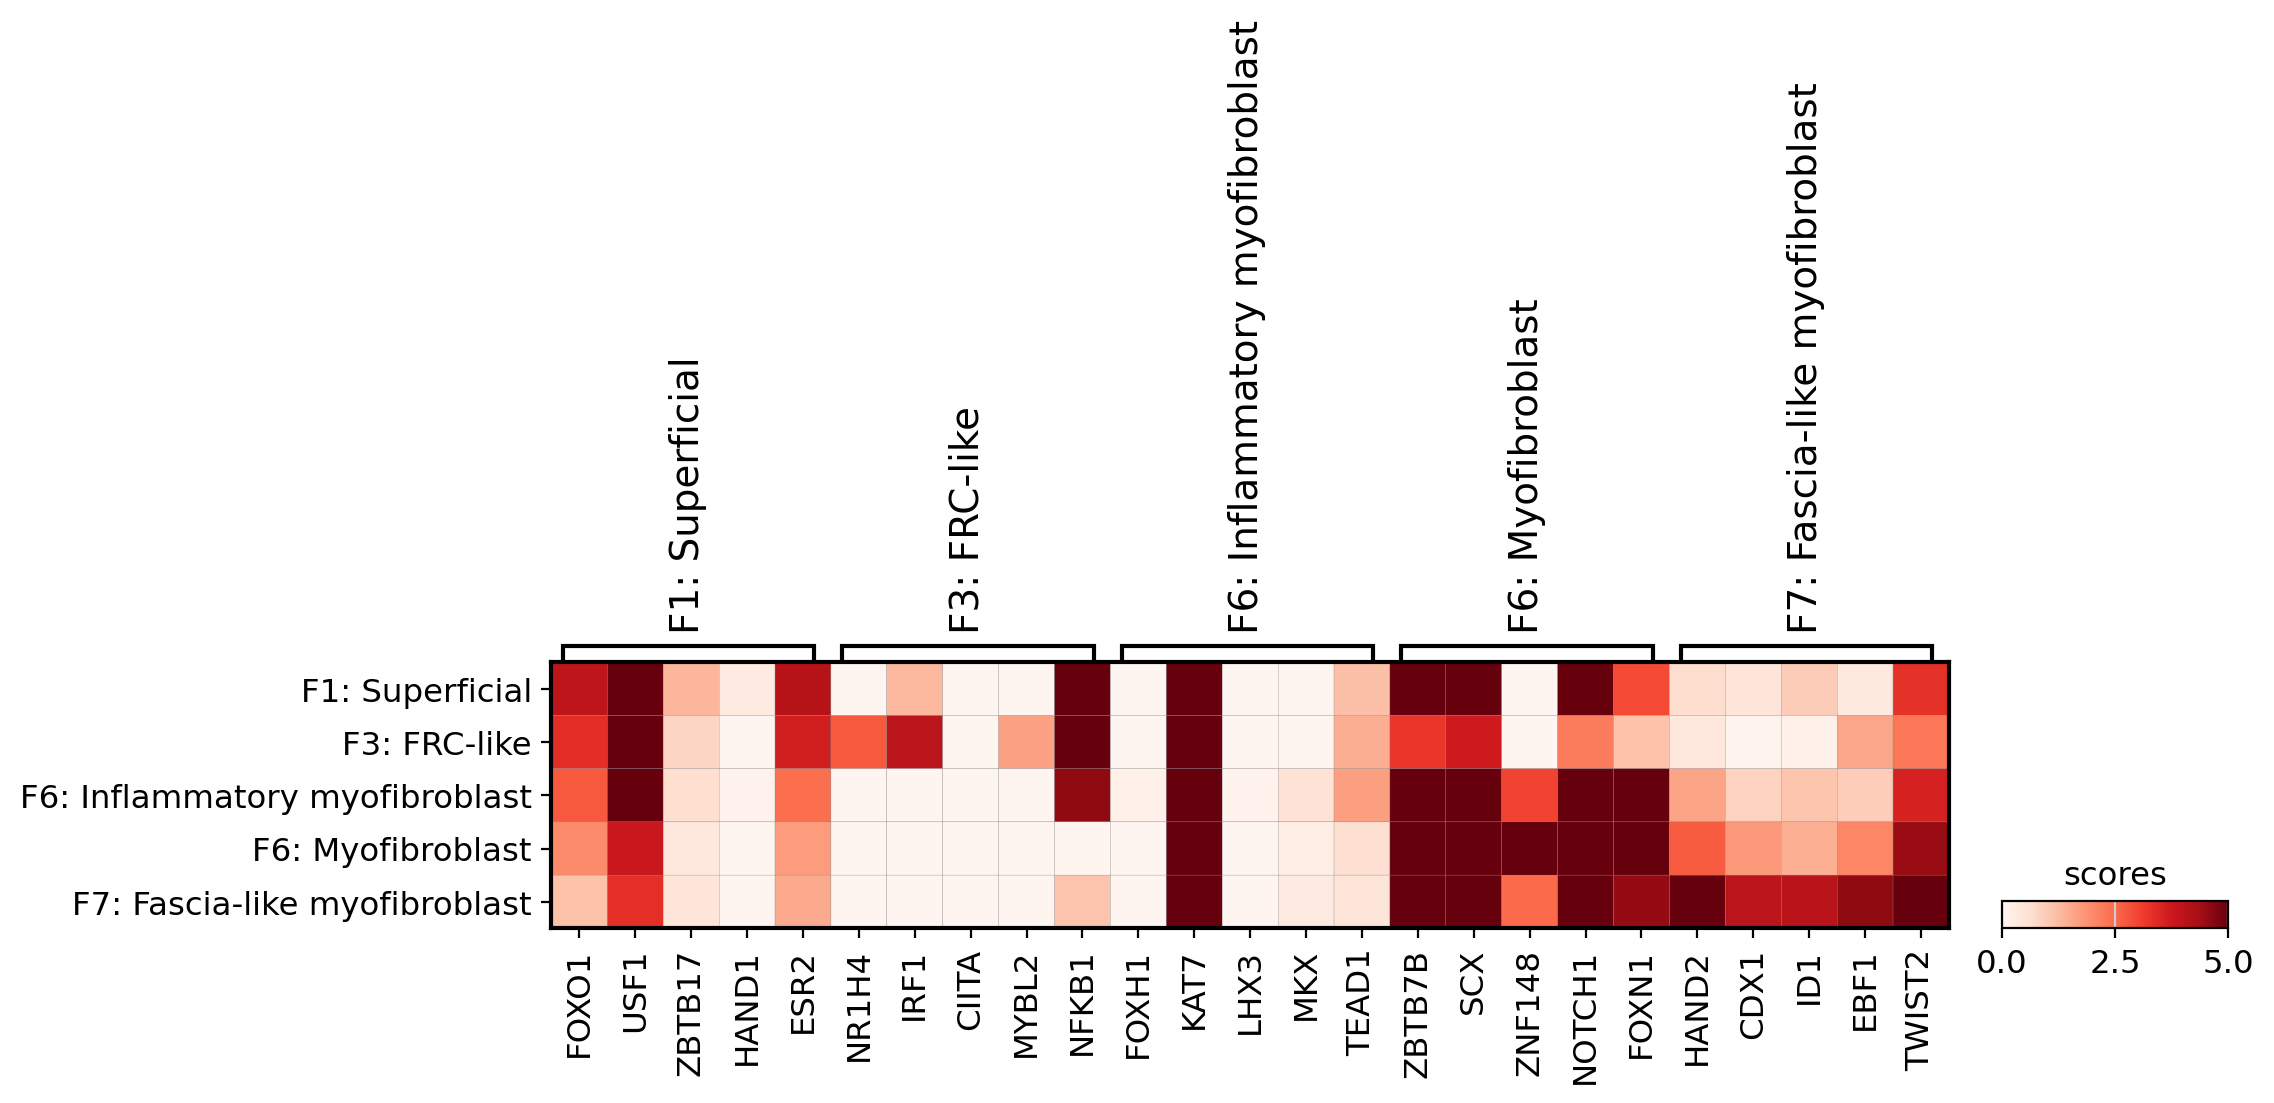

In [27]:
ORDER=['F1: Superficial',
 #'F2: Universal',
  #      'F2/3: Stroma_PPARG+',
 'F3: FRC-like',
 ##'F4: DS_DPEP1+',
 #'F4: TNN+COCH+',
 #'F4: DP_HHIP+', 'F5: RAMP1+',
 #'F5: NGFR+',

 'F6: Inflammatory myofibroblast',
 'F6: Myofibroblast',

 'F7: Fascia-like myofibroblast',
 #'F_Fascia',
      ]
# sc.pl.matrixplot(acts, source_markers, 'test13', dendrogram=True, standard_scale='var',
#                  colorbar_title='Z-scaled scores', cmap='Reds',categories_order=ORDER)
# sc.pl.matrixplot(acts, source_markers, 'test13', dendrogram=True,#standard_scale='var',
#                  colorbar_title='scores', cmap='Reds',categories_order=ORDER,
#                 vmax=15)

import pandas as pd

# Explicitly set category order
acts.obs['test13'] = pd.Categorical(acts.obs['test13'], categories=ORDER, ordered=True)

# Plot without dendrogram (ensures category order is used)
sc.pl.matrixplot(
    acts, source_markers, 'test13', 
    dendrogram=False,  # Disable automatic reordering
    standard_scale='var', colorbar_title='Z-scaled scores', 
    cmap='Reds', categories_order=ORDER
)

sc.pl.matrixplot(
    acts, source_markers, 'test13', 
    dendrogram=False,  # Disable automatic reordering
    colorbar_title='scores', cmap='Reds', 
    categories_order=ORDER, vmax=5,vmin=0,
)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


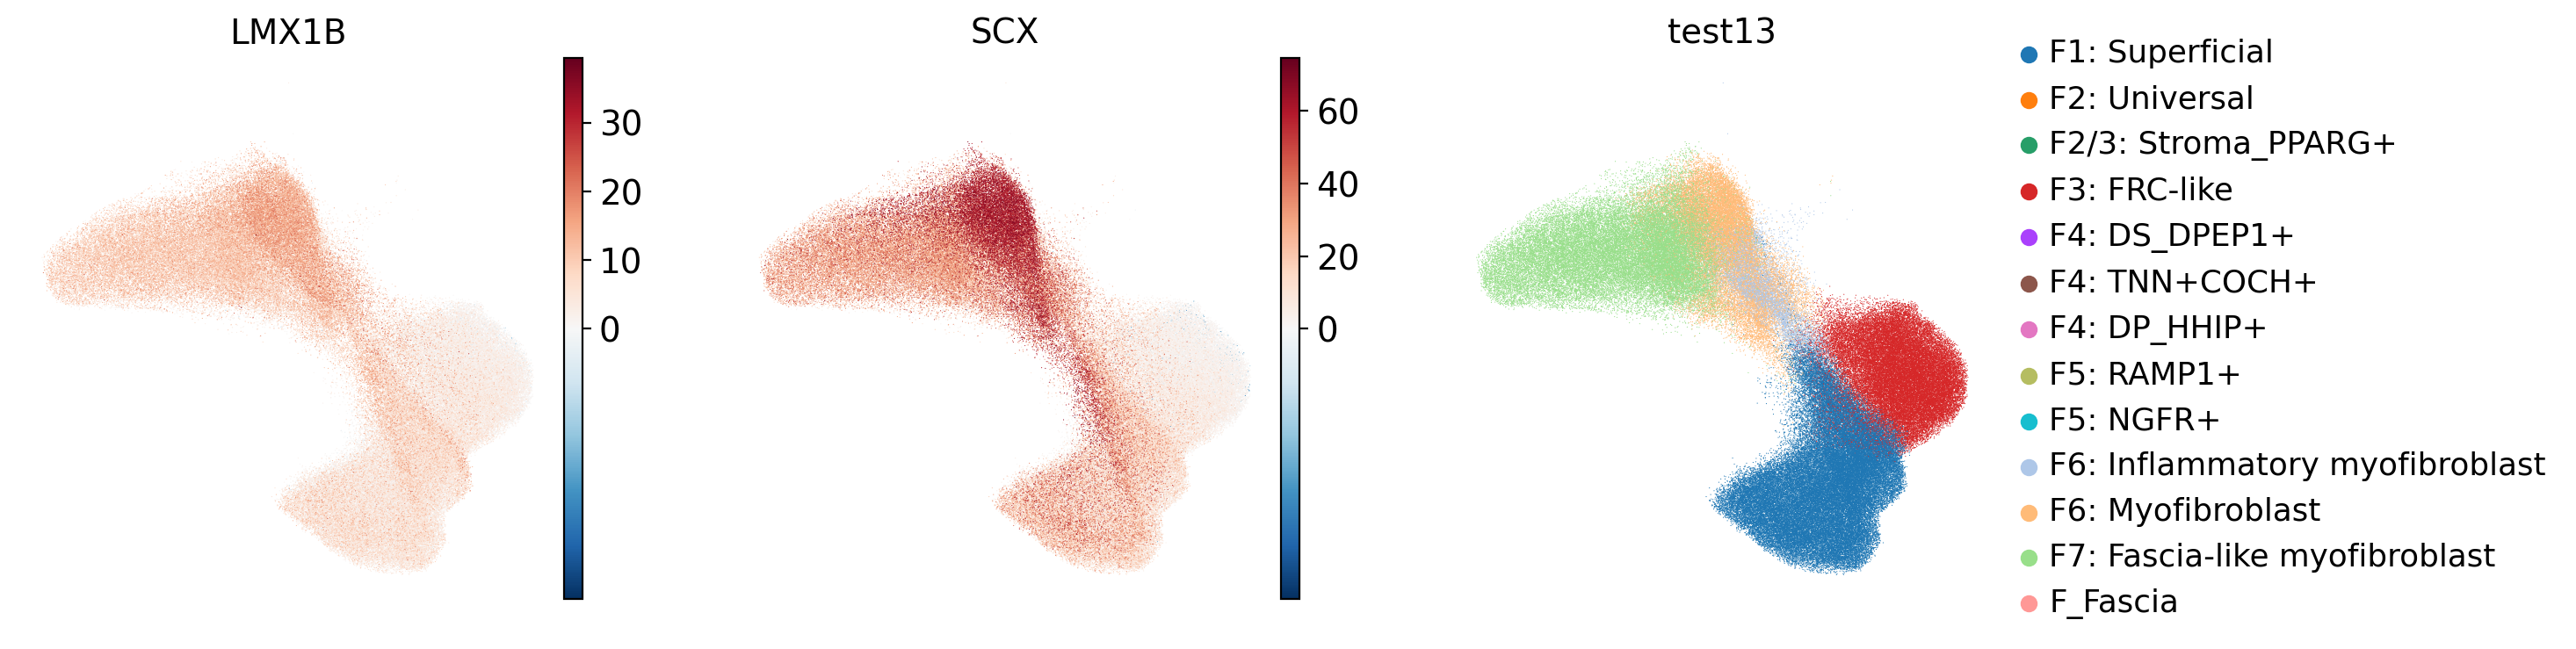

In [16]:
sc.pl.umap(acts, color=['RUNX2', "SCX", 'test13'], cmap='RdBu_r', vcenter=0)




In [17]:
list(adata.obs.test13.unique())

['F1: Superficial',
 'F3: FRC-like',
 'F7: Fascia-like myofibroblast',
 'F6: Myofibroblast',
 'F6: Inflammatory myofibroblast']

In [18]:
source_markers={'F1: Superficial': ['HAND1', 'USF2', 'SREBF1', 'PITX2', 'ZBTB17'],

 'F2: Universal': ['ZFPM2', 'SPIB', 'KLF5', 'SKIL', 'USF1'],
                 'F2/3: Stroma_PPARG+': ['NR1H4', 'MSX2', 'RFX5', 'SMAD7', 'CIITA'],
 'F3: FRC-like': ['NFKB1', 'RELB', 'RELA', 'NR1H3', 'IRF1'],

 'F4: DS_DPEP1+': ['E2F4', 'MYC', 'TBX20', 'NPM1', 'MLX'],
 'F4: TNN+COCH+': ['TCF15', 'MYF5', 'HLX', 'ZNF202', 'NR5A2'],
                 'F4: DP_HHIP+': ['FOXD1', 'LHX3', 'FOXH1', 'GSC', 'IRX1'],

 'F5: RAMP1+': ['HIPK2', 'APEX1', 'KLF8', 'PAWR', 'TP73'],
                 'F5: NGFR+': ['APEX1', 'TP73', 'TP63', 'RFX5', 'CIITA'],
 'F6: Inflammatory myofibroblast': ['LMX1B', 'KAT7', 'FOSB', 'HOXA11', 'MYRF'],
 'F6: Myofibroblast': ['DLX5', 'SP7', 'SCX', 'ZBTB7B', 'NFATC4'],
 'F7: Fascia-like myofibroblast': ['HAND2', 'CDX1', 'ID1', 'TWIST2', 'EBF1'],
 'F_Fascia': ['SON', 'SOX6', 'SOX5', 'SOX17', 'SOX9']}

In [19]:
source_markers

{'F1: Superficial': ['HAND1', 'USF2', 'SREBF1', 'PITX2', 'ZBTB17'],
 'F2: Universal': ['ZFPM2', 'SPIB', 'KLF5', 'SKIL', 'USF1'],
 'F2/3: Stroma_PPARG+': ['NR1H4', 'MSX2', 'RFX5', 'SMAD7', 'CIITA'],
 'F3: FRC-like': ['NFKB1', 'RELB', 'RELA', 'NR1H3', 'IRF1'],
 'F4: DS_DPEP1+': ['E2F4', 'MYC', 'TBX20', 'NPM1', 'MLX'],
 'F4: TNN+COCH+': ['TCF15', 'MYF5', 'HLX', 'ZNF202', 'NR5A2'],
 'F4: DP_HHIP+': ['FOXD1', 'LHX3', 'FOXH1', 'GSC', 'IRX1'],
 'F5: RAMP1+': ['HIPK2', 'APEX1', 'KLF8', 'PAWR', 'TP73'],
 'F5: NGFR+': ['APEX1', 'TP73', 'TP63', 'RFX5', 'CIITA'],
 'F6: Inflammatory myofibroblast': ['LMX1B', 'KAT7', 'FOSB', 'HOXA11', 'MYRF'],
 'F6: Myofibroblast': ['DLX5', 'SP7', 'SCX', 'ZBTB7B', 'NFATC4'],
 'F7: Fascia-like myofibroblast': ['HAND2', 'CDX1', 'ID1', 'TWIST2', 'EBF1'],
 'F_Fascia': ['SON', 'SOX6', 'SOX5', 'SOX17', 'SOX9']}

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


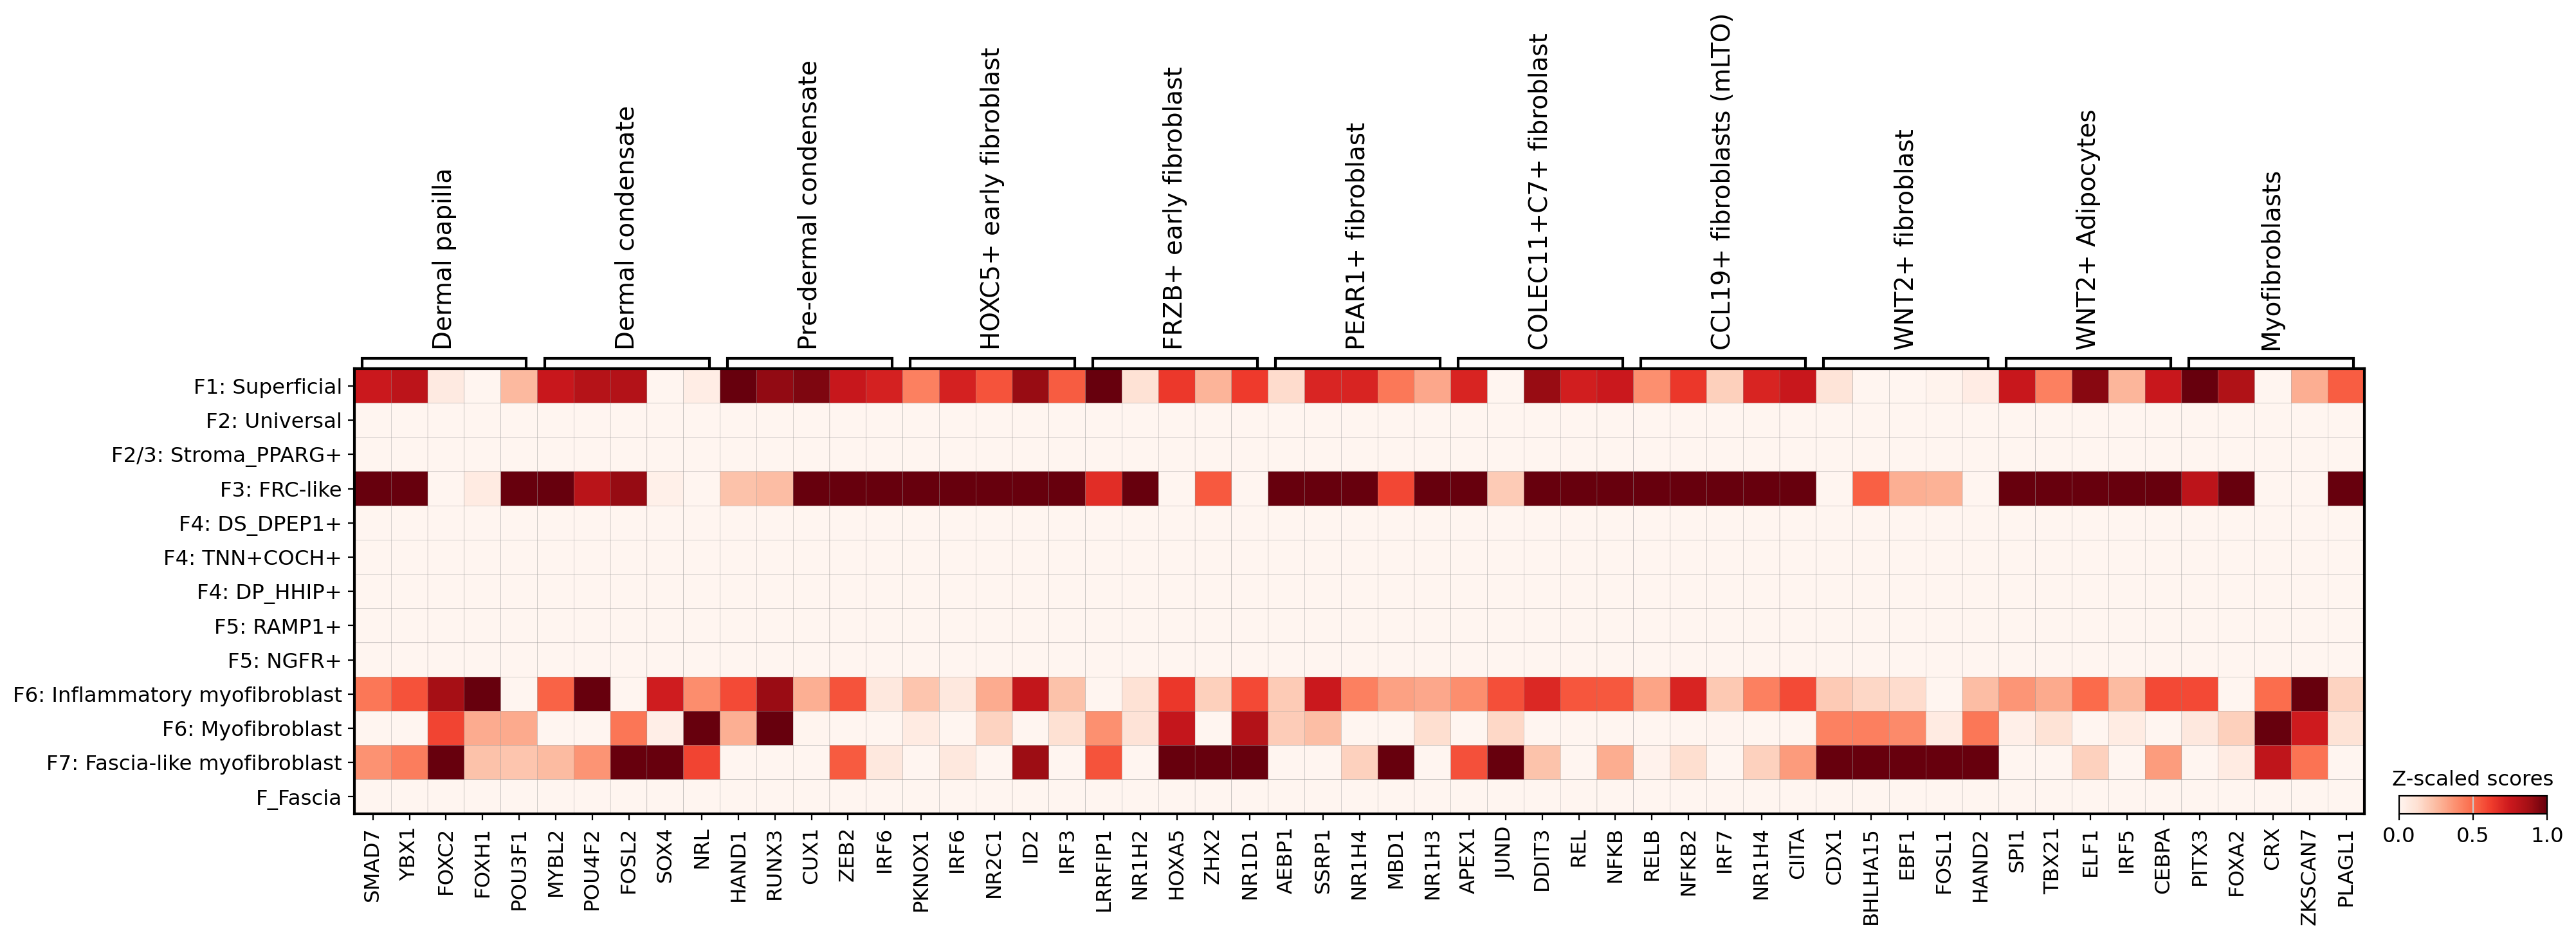

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


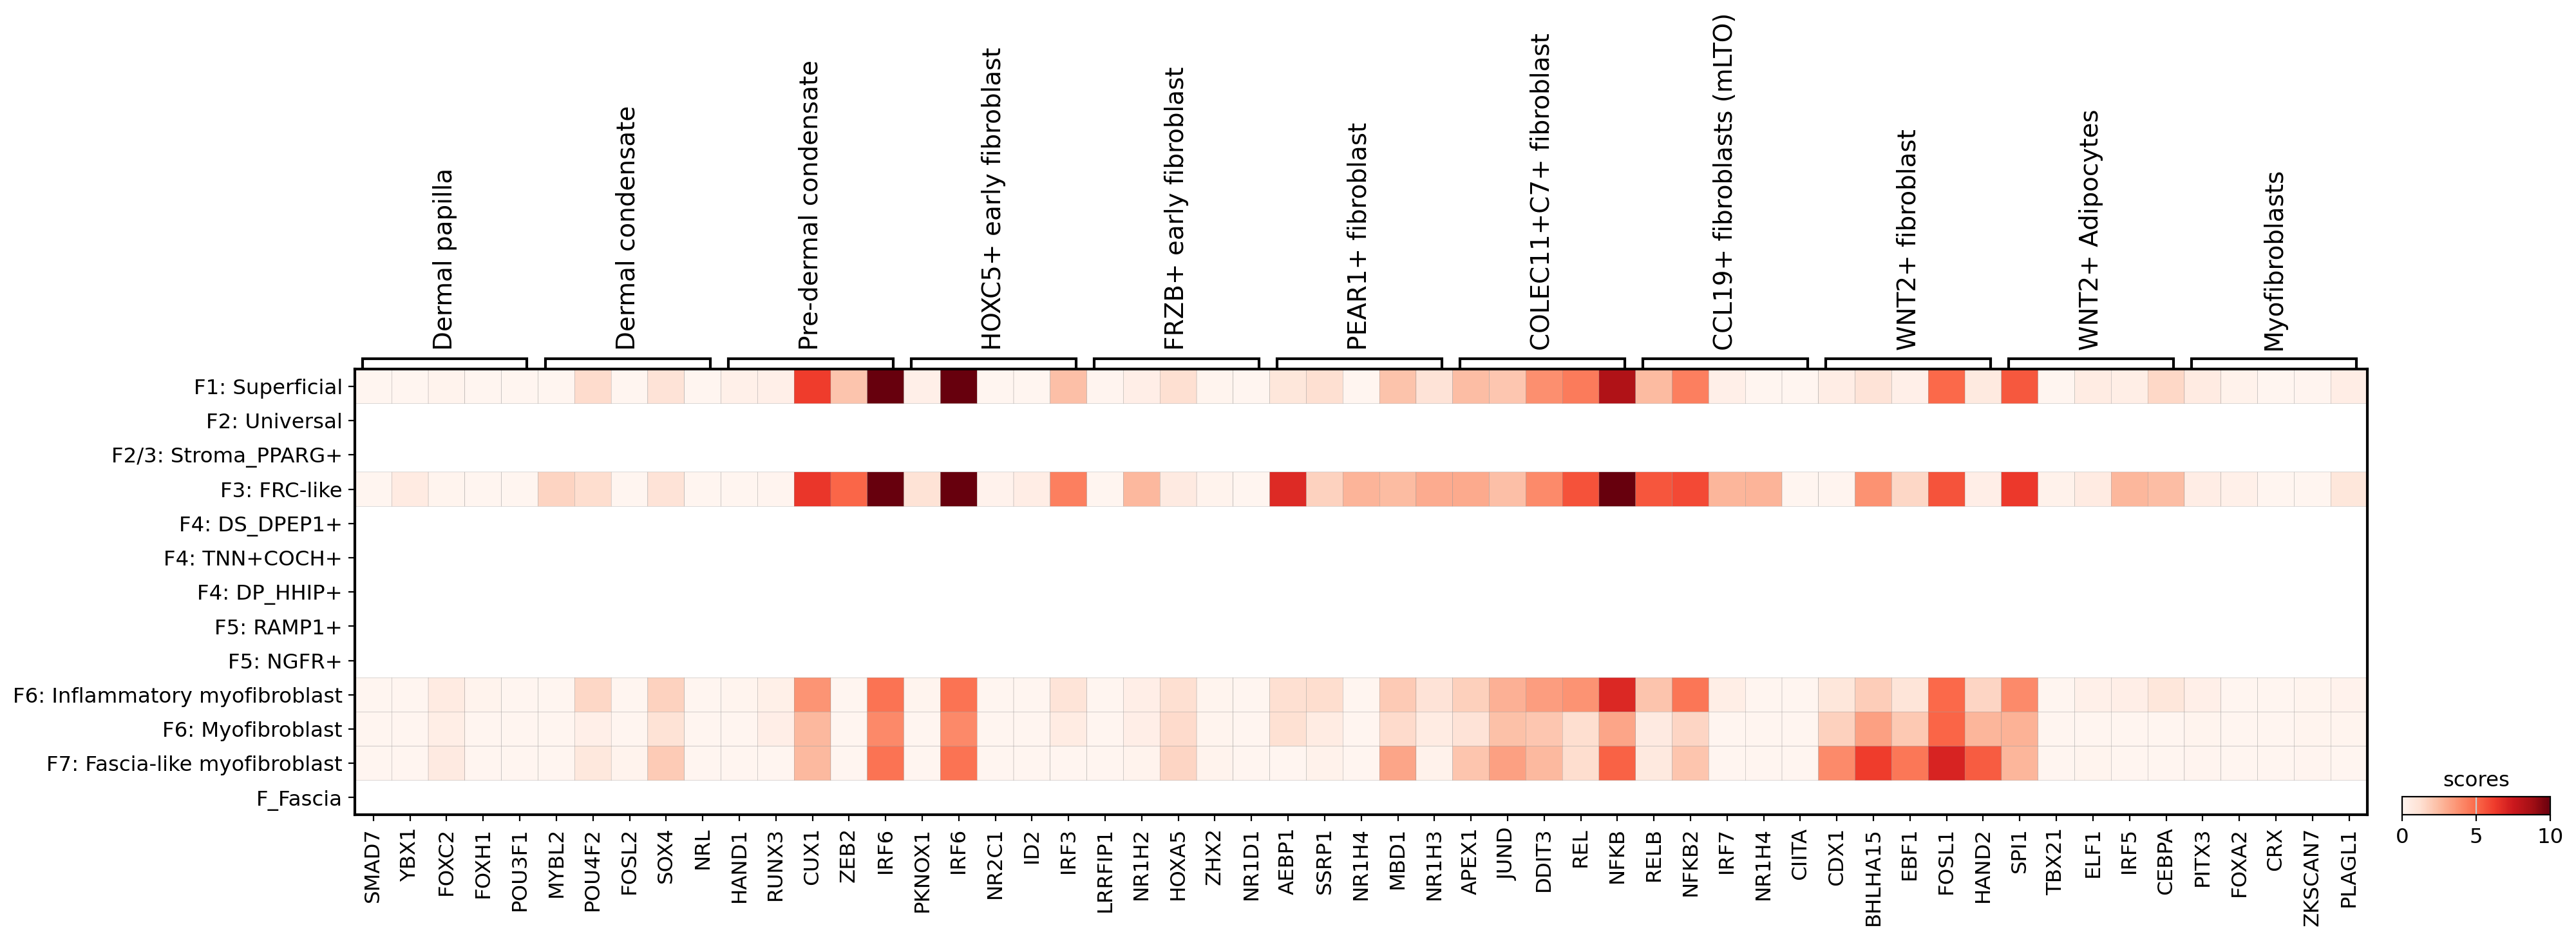

In [20]:
fetal_source_markers = {'Dermal papilla': ['SMAD7', 'YBX1', 'FOXC2', 'FOXH1', 'POU3F1'],
 'Dermal condensate': ['MYBL2', 'POU4F2', 'FOSL2', 'SOX4', 'NRL'],
 'Pre-dermal condensate': ['HAND1', 'RUNX3', 'CUX1', 'ZEB2', 'IRF6'],
 'HOXC5+ early fibroblast': ['PKNOX1', 'IRF6', 'NR2C1', 'ID2', 'IRF3'],
 'FRZB+ early fibroblast': ['LRRFIP1', 'NR1H2', 'HOXA5', 'ZHX2', 'NR1D1'],
 'PEAR1+ fibroblast': ['AEBP1', 'SSRP1', 'NR1H4', 'MBD1', 'NR1H3'],
 'COLEC11+C7+ fibroblast': ['APEX1', 'JUND', 'DDIT3', 'REL', 'NFKB'],
 'CCL19+ fibroblasts (mLTO)': ['RELB', 'NFKB2', 'IRF7', 'NR1H4', 'CIITA'],
 'WNT2+ fibroblast': ['CDX1', 'BHLHA15', 'EBF1', 'FOSL1', 'HAND2'],
 'WNT2+ Adipocytes': ['SPI1', 'TBX21', 'ELF1', 'IRF5', 'CEBPA'],
 'Myofibroblasts': ['PITX3', 'FOXA2', 'CRX', 'ZKSCAN7', 'PLAGL1']}

fetal_source_markers = {
    key: [gene for gene in genes if gene in acts.var_names] 
    for key, genes in fetal_source_markers.items()
}

sc.pl.matrixplot(
    acts, fetal_source_markers, 'test13', 
    dendrogram=False,  # Disable automatic reordering
    standard_scale='var', colorbar_title='Z-scaled scores', 
    cmap='Reds', categories_order=ORDER
)

sc.pl.matrixplot(
    acts, fetal_source_markers, 'test13', 
    dendrogram=False,  # Disable automatic reordering
    colorbar_title='scores', cmap='Reds', 
    categories_order=ORDER, vmax=10,vmin=-0,
)

In [21]:
acts.obs

sample_id           barcode        dataset_id  \
AACACACAGGATGCGT_GSM6111852  GSM6111852  AACACACAGGATGCGT  Healthy_Weidmann   
AACCCAATCACAAGAA_GSM6111852  GSM6111852  AACCCAATCACAAGAA  Healthy_Weidmann   
AACCCAATCTATTTCG_GSM6111852  GSM6111852  AACCCAATCTATTTCG  Healthy_Weidmann   
AAGCCATTCCAAGGGA_GSM6111852  GSM6111852  AAGCCATTCCAAGGGA  Healthy_Weidmann   
ACAAGCTTCACTTATC_GSM6111852  GSM6111852  ACAAGCTTCACTTATC  Healthy_Weidmann   
...                                 ...               ...               ...   
TTTGCGCCACAACTGT_P3          SKN8090605  TTTGCGCCACAACTGT          Reynolds   
TTTGCGCTCGGAGGTA_P3          SKN8090605  TTTGCGCTCGGAGGTA          Reynolds   
TTTGTCAAGTACGACG_P3          SKN8090605  TTTGTCAAGTACGACG          Reynolds   
TTTGTCACACGAAAGC_P3          SKN8090605  TTTGTCACACGAAAGC          Reynolds   
GGGTGAAGTTCAATCG_GSM5652720  GSM5652720  GGGTGAAGTTCAATCG      Lupus_Dunlap   

                                   GSE  Site_status Patient_status  \
AACACACAGGATGCGT_GSM6111852  GSE202352  Nonlesional        Healthy   
AACCCAATCACAAGAA_GSM6111852  GSE202352  Nonlesional        Healthy   
AACCCAATCTATTTCG_GSM6111852  GSE202352  Nonlesional        Healthy   
AAGCCATTCCAAGGGA_GSM6111852  GSE202352  Nonlesional        Healthy   
ACAAGCTTCACTTATC_GSM6111852  GSE202352  Nonlesional        Healthy   
...                                ...          ...            ...   
TTTGCGCCACAACTGT_P3           Reynolds     Lesional      Psoriasis   
TTTGCGCTCGGAGGTA_P3           Reynolds     Lesional      Psoriasis   
TTTGTCAAGTACGACG_P3           Reynolds     Lesional      Psoriasis   
TTTGTCACACGAAAGC_P3           Reynolds     Lesional      Psoriasis   
GGGTGAAGTTCAATCG_GSM5652720  GSE186476  Nonlesional           SCLE   

                                DonorID    Location           Age      Sex  \
AACACACAGGATGCGT_GSM6111852  GSM6111852         Hip           <40        F   
AACCCAATCACAAGAA_GSM6111852  GSM6111852         Hip           <40        F   
AACCCAATCTATTTCG_GSM6111852  GSM6111852         Hip           <40        F   
AAGCCATTCCAAGGGA_GSM6111852  GSM6111852         Hip           <40        F   
ACAAGCTTCACTTATC_GSM6111852  GSM6111852         Hip           <40        F   
...                                 ...         ...           ...      ...   
TTTGCGCCACAACTGT_P3          SKN8090605  Lower_back  Reyn_missing  Missing   
TTTGCGCTCGGAGGTA_P3          SKN8090605  Lower_back  Reyn_missing  Missing   
TTTGTCAAGTACGACG_P3          SKN8090605  Lower_back  Reyn_missing  Missing   
TTTGTCACACGAAAGC_P3          SKN8090605  Lower_back  Reyn_missing  Missing   
GGGTGAAGTTCAATCG_GSM5652720  GSM5652720         Hip            65   Female   

                             ...                  disease_category  \
AACACACAGGATGCGT_GSM6111852  ...                               NaN   
AACCCAATCACAAGAA_GSM6111852  ...                               NaN   
AACCCAATCTATTTCG_GSM6111852  ...                               NaN   
AAGCCATTCCAAGGGA_GSM6111852  ...                               NaN   
ACAAGCTTCACTTATC_GSM6111852  ...                               NaN   
...                          ...                               ...   
TTTGCGCCACAACTGT_P3          ...  Inflammatory+\nlow scarring risk   
TTTGCGCTCGGAGGTA_P3          ...  Inflammatory+\nlow scarring risk   
TTTGTCAAGTACGACG_P3          ...  Inflammatory+\nlow scarring risk   
TTTGTCACACGAAAGC_P3          ...  Inflammatory+\nlow scarring risk   
GGGTGAAGTTCAATCG_GSM5652720  ...                               NaN   

                                               macfb                   macfb2  \
AACACACAGGATGCGT_GSM6111852            F1: Secretory            F1: Secretory   
AACCCAATCACAAGAA_GSM6111852            F1: Secretory            F1: Secretory   
AACCCAATCTATTTCG_GSM6111852            F1: Secretory            F1: Secretory   
AAGCCATTCCAAGGGA_GSM6111852            F1: Secretory            F1: Secretory   
ACAAGCTTCACTTATC_GSM6111852            F1: Secretory     

In [22]:
import pandas as pd

# Ensure correct category order
acts.obs['test13'] = pd.Categorical(acts.obs['test13'], categories=ORDER, ordered=True)

# Now plot
sc.pl.matrixplot(
    acts, source_markers, 'test13', dendrogram=True, 
    standard_scale='var', colorbar_title='Z-scaled scores', 
    cmap='RdBu_r', categories_order=ORDER
)

sc.pl.matrixplot(
    acts, source_markers, 'test13', dendrogram=True,
    colorbar_title='scores', cmap='RdBu_r', 
    categories_order=ORDER
)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


ValueError: Distance matrix 'X' must be symmetric.

In [ ]:
ALL_GENES={'F1: Superficial': ['PITX2', 'RUNX2', 'SMAD3', 'POU2F2', 'HOXA5'],
 'F2/3: Stroma_PPARG+': ['APEX1', 'CEBPA', 'RFX5', 'CIITA', 'FLI1'],
 'F2: Universal': ['ZFPM2', 'SPIB', 'KLF5', 'SKIL', 'FOSL1'],
 'F3: FRC-like': ['NR1H3', 'NFKB1', 'NFKB', 'RELB', 'RELA'],
 'F4: DP_HHIP+': ['GSC', 'FOXH1', 'GRHL3', 'NKX3-2', 'PAX2'],
 'F4: DS_DPEP1+': ['NFATC1', 'FOXH1', 'TCF7', 'NR4A2', 'PAX8'],
 'F4: TNN+COCH+': ['IRF8', 'ZNF382', 'MYF5', 'RUNX3', 'MYOD1'],
 'F5: NGFR+': ['TP63', 'APEX1', 'CTNNB1', 'TP73', 'CIITA'],
 'F5: RAMP1+': ['PDX1', 'BARX2', 'TP73', 'TBX2', 'CIITA'],
 'F1: Superficial_disease': ['HAND1', 'USF2', 'SREBF1', 'PITX2', 'ZBTB17'],
 'F3: FRC-like_dosease': ['NFKB1', 'RELB', 'RELA', 'NR1H3', 'IRF1'],
 'F6: Inflammatory myofibroblast': ['LMX1B', 'KAT7', 'FOSB', 'HOXA11', 'MYRF'],
 'F6: Myofibroblast': ['DLX5', 'SP7', 'SCX', 'ZBTB7B', 'NFATC4'],
 'F7: Fascia-like myofibroblast': ['HAND2', 'CDX1', 'ID1', 'TWIST2', 'EBF1'],
 'F_Fascia': ['SON', 'SOX6', 'SOX5', 'SOX17', 'SOX9']}
sc.pl.matrixplot(acts, ALL_GENES, 'test13', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')
sc.pl.matrixplot(acts, ALL_GENES, 'test13', dendrogram=True,#standard_scale='var',
                 colorbar_title='scores', cmap='RdBu_r')

In [ ]:
sc.pl.violin(acts, keys=['RUNX2'], groupby='test13', rotation=90)


In [ ]:
dc.plot_network(
    net=net,
    n_sources=['HIF1A', 'RUNX2'],
    n_targets=5,
    node_size=1,
    s_cmap='white',
    t_cmap='white',
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    figsize=(15, 15)
)

In [ ]:
FETAL_TFS= {'CCL19+ fibroblasts (mLTO)': ['RELB', 'NFKB2', 'NR1H4', 'IRF7', 'TFAP2B'],
 'COLEC11+C7+ fibroblast': ['APEX1', 'NFKB', 'DDIT3', 'REL', 'AHR'],
 'Dermal condensate': ['MYBL2', 'POU4F2', 'ZNF699', 'FOSL2', 'MYOD1'],
 'Dermal papilla': ['YBX1', 'SMAD7', 'FOXC2', 'POU3F1', 'HOXA13'],
 'FRZB+ early fibroblast': ['NR5A1', 'SOX10', 'BCL11A', 'FOXC1', 'LITAF'],
 'HOXC5+ early fibroblast': ['NR2C1', 'IRF6', 'ZBTB16', 'IRF3', 'TCF7L2'],
 'Myofibroblasts': ['FOXA2', 'PITX3', 'FOXJ1', 'KLF2', 'MSX1'],
 'PEAR1+ fibroblast': ['NR1H2', 'SSRP1', 'NR1H3', 'NR1H4', 'MBD1'],
 'Pre-dermal condensate': ['CUX1', 'PITX2', 'SRSF2', 'RUNX2', 'ZEB2'],
 'WNT2+ Adipocytes': ['SPI1', 'TBX21', 'ELF1', 'KAT6A', 'CEBPA'],
 'WNT2+ fibroblast': ['CDX1', 'BHLHA15', 'EBF1', 'HAND2', 'ZNF148']}

sc.pl.matrixplot(acts, FETAL_TFS, 'test13', dendrogram=True,#standard_scale='var',
                 colorbar_title='scores', cmap='RdBu_r')